# Anadonda Script для Voice AI challenge 2021. 

In [2]:
# Сначала импортируем все важные библиотеки

In [3]:
import numpy as np
import pandas as pd
import requests
import json

In [4]:
# В excel мы сделали чистку данных. К сожалению нам пришлось убрать 837 битых + 2942 неправильных голосовых файлов.

In [27]:
dataset_common_uzbek_words = pd.read_csv("./dataset/popularUzbekWords.csv", encoding='cp1252') 
dataset_voice_files = pd.read_csv("./dataset/newData.csv", encoding='utf-8')

dataset_common_uzbek_words = dataset_common_uzbek_words
dataset_common_uzbek_words

,Number,Uzbek,in English
0,1,sifatida,as
1,2,men,I
2,3,uning,his
3,4,ekan,that
4,5,u,he
...,...,...,...
995,996,burun,nose
996,997,ko’plik,plural
997,998,g’azab,anger
998,999,talab,claim


In [28]:
dataset_voice_files

,Column1,text,voice_id,is_correct
0,24,"Bashorat qilish juda qiyin narsa, ayniqsa kela...",AwACAgIAAxkBAAIK9l-hp4FI_giM4buhcgNnT0HpeDTCAA...,True
1,25,Hali ham yosh bola ekansan.,AwACAgIAAxkBAAIKtl-hpjazPHo3gWKdgXrX-xmd-N2-AA...,True
2,26,Bolsheviklar ham xuddi shu ishni qilishadi,AwACAgIAAxkBAAIKeF-hpVGwsfewrkz4SM3ablOvwhuTAA...,True
3,27,O’zbek musiqiy sana’ti afsonasi Ruslan Sharipo...,AwACAgIAAxkBAAIR_l-i_frVgSlBG16FFxejZJRnLaNKAA...,True
4,28,AQShda bugun saylov kuni. Har gal saylovlar bo...,AwACAgIAAxkBAAISOl-jAAGcLFVMKHRoJPJVkW0YXW0SZw...,True
...,...,...,...,...
10467,14246,U orqali Siz dunyoning ixtiyoriy nuqtasidagi e...,AwACAgIAAxkBAAK13WA0qhBCwfcVoZ9EDiJYYXb-811gAA...,True
10468,14247,Agar siz qirg'oqni ko'rishni yo'qotishdan qo'r...,AwACAgIAAxkBAAK1IWA0qKBKZdOfUOQ_jh1MtWp4L6xhAA...,True
10469,14248,"Bu o'ziga xos yoqilg'i quyish shoxobchasi, bun...",AwACAgIAAxkBAAK3nGA0rSfkxMpIrWBA31tG6yBTQW6uAA...,True
10470,14249,faqat ular ham bizdek o‘ylagan vaqtda.,AwACAgIAAxkBAAK2HGA0qmem_maOzLQ_W5pvdrhimHnSAA...,True


In [75]:
dataset_common_uzbek_words_occurances = dataset_common_uzbek_words
dataset_common_uzbek_words_occurances['Number of occurance'] = 0

for i, voice_sentence in dataset_voice_files["text"].iteritems():
    
    for k, common_word in dataset_common_uzbek_words['Uzbek'].iteritems():
        
        _common_word = " " + common_word
        common_word_ = common_word + " "
        _common_word_ = " " + common_word + " "
        
        if _common_word in voice_sentence or common_word_ in voice_sentence or _common_word_ in voice_sentence:
            x = voice_sentence + " has the word " + common_word
            try:
                if (voice_sentence.index(_common_word) == len(voice_sentence) - 1 or voice_sentence.index(common_word_) == 0 or _common_word_ in voice_sentence):
                    
                    dataset_common_uzbek_words_occurances.loc[k, "Number of occurance"] = int(dataset_common_uzbek_words_occurances.loc[k, "Number of occurance"]) + 1
                    print(i, x)
            except:
                pass

0 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word nima
0 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word nima
0 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word juda
0 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word qiyin
0 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word ayniqsa
1 Hali ham yosh bola ekansan. has the word bola
1 Hali ham yosh bola ekansan. has the word ham
1 Hali ham yosh bola ekansan. has the word yosh
1 Hali ham yosh bola ekansan. has the word yosh bola
1 Hali ham yosh bola ekansan. has the word yosh
2 Bolsheviklar ham xuddi shu ishni qilishadi has the word ham
5 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
5 

106 Bizning Marg‘ilonda bir qiz bor. has the word bir
106 Bizning Marg‘ilonda bir qiz bor. has the word qiz
107 Lekin buni kamida bir yil sinash kerak. has the word bir
107 Lekin buni kamida bir yil sinash kerak. has the word yil
107 Lekin buni kamida bir yil sinash kerak. has the word kamida
109 Suv suyuq boʻlgani kabi, byudjetdan tashqari byudjet ham yomon narsa. has the word ham
109 Suv suyuq boʻlgani kabi, byudjetdan tashqari byudjet ham yomon narsa. has the word tashqari
109 Suv suyuq boʻlgani kabi, byudjetdan tashqari byudjet ham yomon narsa. has the word yomon
109 Suv suyuq boʻlgani kabi, byudjetdan tashqari byudjet ham yomon narsa. has the word suyuq
114 Qilichbozlikda Temurbek hammadan ustun keldi has the word ustun
116 Pul bu kuch has the word bu
117 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word farq
117 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word ham
117 Meva-sabzavotlar narxlari bozorlarda bir

206 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
206 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
206 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word juda
206 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
207 Buni sababi — imkoniyatlar unchalik teng emasligi has the word teng
208 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word sifatida
208 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word odam
208 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word odam
210 Hurmatimni joyiga qoʻymasa, men ham uni hurmat qilib boʻlibman! has the word men
210 Hurmatimni joyiga qoʻymasa, men ham uni hurmat qilib boʻlibman! has the word ham
210 Hurmatimni joyiga qo

314 Tabiat bizga imkonsiz narsalar sodir bo’lishi ehtimoli borligini o’rgatadi. has the word sodir
316 Xullas shu kino chiqishini intizorlik bilan kutaman. has the word bilan
318 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word va
318 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word uni
318 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word sxema
320 Pomidor va bodring ayrim hududlar markazlarida keskin qimmatlagan. has the word va
321 Koʻrasiz barchasini unga aytib beraman. has the word aytib
324 Har bir mamlakatda yangi dori-darmonlar ishlab chiqarilganidan keyin u bir necha bosqichda sinovlardan o‘tkaziladi, jumladan vaksinalar ham. has the word u
324 Har bir mamlakatda yangi dori-darmonlar ishlab chiqarilganidan keyin u bir necha bosqichda sinovlardan o‘tkaziladi, jumladan vaksinalar ham. has the word bir
324 Har bir mamlakatda yangi dori-dar

428 Barchani shu kun bilan tabriklayman! has the word bilan
428 Barchani shu kun bilan tabriklayman! has the word kun
428 Barchani shu kun bilan tabriklayman! has the word kun
429 Ustigа kichkinаginа bir to‘shаkni yoydi has the word bir
432 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word uning
432 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word uchun
432 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word uchun
432 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word uning
432 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word avtomobil
432 Ushbu avtomobil tannarxini tushirish uch

532 Aksariyat masalalar bo’yicha o’z fikrim bo’lmasligiga harakat qilyapman. has the word harakat
532 Aksariyat masalalar bo’yicha o’z fikrim bo’lmasligiga harakat qilyapman. has the word harakat
533 Qisqa muddatlarda kuz-qish mavsumida muqobil yoqilg‘i turlaridan foydalanishni amalga oshirish ko‘zda tutilgan. has the word oshirish
533 Qisqa muddatlarda kuz-qish mavsumida muqobil yoqilg‘i turlaridan foydalanishni amalga oshirish ko‘zda tutilgan. has the word oshirish
534 Iqtisodiy faoliyat turlari kesimida korxonalar quyidagicha taqsimlandi has the word faoliyat
536 Ammo u yolg‘iz emasdi has the word u
536 Ammo u yolg‘iz emasdi has the word u
536 Ammo u yolg‘iz emasdi has the word u
538 Siz ham roʻyxatdan oʻting. Doʻstlaringiz bilan boʻlishing. has the word bilan
538 Siz ham roʻyxatdan oʻting. Doʻstlaringiz bilan boʻlishing. has the word ham
539 Yana bir qulay tomoni zarur ma`lumot nusxasini ko`chirib olishingiz mumkin. has the word bir
539 Yana bir qulay tomoni zarur ma`lumot nusxasin

633 Akkumulyatorlar sovuq iqlimga qanchalik bardosh beradi. has the word sovuq
634 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word ham
634 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word kuz
635 Iqtisodiy faoliyat turlari kesimida korxonalar quyidagicha taqsimlandi has the word faoliyat
636 U bosh egishni bilmasdi has the word bosh
638 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word yoki
638 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word katta
638 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word katta
638 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word yoki
638 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word yoki
638 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix y

736 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word ichida
736 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yil
736 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yarim
736 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yaratish
739 Tosh supaga ming askar joylashibdi has the word ming
739 Tosh supaga ming askar joylashibdi has the word askar
742 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word ichida
742 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yil
742 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yarim
742 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yaratish
743 Bu kutubxonadan foydalanish juda qulay. has the word juda
743 Bu kutubxonadan foydalanish juda qulay. has the word foydalanish
744 Kutubxona deganda, odatda, ko`plab kitoblar terib 

845 Yana bir qulay tomoni zarur ma`lumot nusxasini ko`chirib olishingiz mumkin. has the word bir
845 Yana bir qulay tomoni zarur ma`lumot nusxasini ko`chirib olishingiz mumkin. has the word zarur
847 Akkumulyatorlar sovuq iqlimga qanchalik bardosh beradi. has the word sovuq
852 Yilining eng muhim yangiligi. has the word eng
852 Yilining eng muhim yangiligi. has the word muhim
853 O’zingizni keragidan ham ortiq harakat qiluvchi shaxs sifatida taniting has the word sifatida
853 O’zingizni keragidan ham ortiq harakat qiluvchi shaxs sifatida taniting has the word harakat
853 O’zingizni keragidan ham ortiq harakat qiluvchi shaxs sifatida taniting has the word ham
853 O’zingizni keragidan ham ortiq harakat qiluvchi shaxs sifatida taniting has the word shaxs
853 O’zingizni keragidan ham ortiq harakat qiluvchi shaxs sifatida taniting has the word harakat
854 Qiziq, ayniqsa O’zbek tili nuqtai nazaridan qarasak. has the word ayniqsa
856 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylari

949 Men ham qo‘shilib yig‘lar edim has the word ham
951 Hayotda birinchi raqamli qobiliyat bu taslim bo'lmaslik has the word bu
951 Hayotda birinchi raqamli qobiliyat bu taslim bo'lmaslik has the word birinchi
952 Qaysi mashg'ulot kunning asosiy qismini egallaydi has the word asosiy
952 Qaysi mashg'ulot kunning asosiy qismini egallaydi has the word asosiy
955 Ilmi ham yomon emas has the word ham
955 Ilmi ham yomon emas has the word yomon
956 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word u
956 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word u
956 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word va
956 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word u
956 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word qirol
958 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayo

1044 Allohga yaqinlashish shunday bir rohatki has the word shunday
1044 Allohga yaqinlashish shunday bir rohatki has the word shunday
1046 Dunyodagi eng badavlat inson sirlari has the word eng
1047 Yuk mashinasida O'zbekistonga kirib kelishadi va qamoqqa olinib, shu yerda halok bo‘lishadi has the word va
1048 Xalq qasoskori bo'lmish Sarvar aravasiga kim chiqadi has the word kim
1049 Odamlar bizga oʻxshagan xulosa qilishsa hush koʻramiz. has the word bizga
1052 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word uchun
1052 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word uchun
1052 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word va
1053 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring narxi keskin ko‘tarilgani oydinlashmoqda. has the word va
1053 o‘siml

1144 Undan tashqari, o‘zbek oshxonasiga doir mahorat darslari ham o‘tkazish rejalashtirilgan. has the word ham
1144 Undan tashqari, o‘zbek oshxonasiga doir mahorat darslari ham o‘tkazish rejalashtirilgan. has the word mahorat
1145 Qayd etish lozim, markaziy dehqon bozorlarida mahalliy hokimiyat rahbarlarining narxlarni tartibga solishga urinishi davom etmoqda. has the word davom
1146 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word bilan
1146 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word qaror
1146 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word aniq
1146 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word aniq
1146 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the w

1259 Naqadar chuqur va ma’noli so’zlar has the word va
1259 Naqadar chuqur va ma’noli so’zlar has the word chuqur
1260 Ish haqi masalasi dasturchi boʻlishni istaydigan har bir kishini qiziqtiradi. has the word bir
1260 Ish haqi masalasi dasturchi boʻlishni istaydigan har bir kishini qiziqtiradi. has the word har bir
1260 Ish haqi masalasi dasturchi boʻlishni istaydigan har bir kishini qiziqtiradi. has the word har bir
1264 Tabiat bizga imkonsiz narsalar sodir bo’lishi ehtimoli borligini o’rgatadi. has the word bo’lishi
1264 Tabiat bizga imkonsiz narsalar sodir bo’lishi ehtimoli borligini o’rgatadi. has the word bizga
1264 Tabiat bizga imkonsiz narsalar sodir bo’lishi ehtimoli borligini o’rgatadi. has the word sodir
1264 Tabiat bizga imkonsiz narsalar sodir bo’lishi ehtimoli borligini o’rgatadi. has the word sodir
1266 Doimo yaxshi odamlar bilan emas, to‘g‘ri odamlar birga bo‘lish kerak has the word bilan
1266 Doimo yaxshi odamlar bilan emas, to‘g‘ri odamlar birga bo‘lish kerak has the 

1371 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganligi holati yuzasidan xususiy ajrim chiqarish yo‘li bilan munosabat bildirildi. has the word qarshi
1371 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganligi holati yuzasidan xususiy ajrim chiqarish yo‘li bilan munosabat bildirildi. has the word qonun
1372 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word yoki
1372 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word katta
1372 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word katta
1372 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word yoki
1372 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word yoki
1372 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta x

1469 Qayd etilishicha, tabiiy gaz taqsimotini muvozanatlashtirish bo‘yicha maxsus vaqtinchalik choralar ko‘rilmoqda has the word tabiiy
1470 kishilar bepoyon yashil o'tloqlar, tevarakni o'rab olgan turli tuman yovvoyi hayvonlaru bo'rilarning hamlalari aro turli taraflarga yo'l olganlar. has the word yashil
1470 kishilar bepoyon yashil o'tloqlar, tevarakni o'rab olgan turli tuman yovvoyi hayvonlaru bo'rilarning hamlalari aro turli taraflarga yo'l olganlar. has the word yovvoyi
1471 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word bilan
1471 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
1471 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
1473 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word farq
1

1580 Qanday qilib ingliz tili grammatikasini oson o’rganish mumkin? has the word o’rganish
1581 Monetar siyosatda katta oʻzgarishlar. has the word katta
1581 Monetar siyosatda katta oʻzgarishlar. has the word katta
1582 Tarjimonning birinchi davlat dumasi bilan uchrashuvi boʻlib oʻtdi has the word bilan
1582 Tarjimonning birinchi davlat dumasi bilan uchrashuvi boʻlib oʻtdi has the word birinchi
1582 Tarjimonning birinchi davlat dumasi bilan uchrashuvi boʻlib oʻtdi has the word davlat
1583 Eng yaxshi talabalar qolganlardan ko‘ra shunchaki ko‘proq mehnat qilib qo‘ya qolmaganlar has the word yaxshi
1583 Eng yaxshi talabalar qolganlardan ko‘ra shunchaki ko‘proq mehnat qilib qo‘ya qolmaganlar has the word yaxshi
1585 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word nima
1585 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word nima
1585 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’li

1696 Qoidalarni va nazariyalarni ayniqsa ularni buzadiganlar yaxshi bilishi kerak. has the word ayniqsa
1697 Dunyodagi eng muqaddas narsalardan biri bu erkinlikdir has the word bu
1697 Dunyodagi eng muqaddas narsalardan biri bu erkinlikdir has the word eng
1700 Azob-uqubatlar har birimiz uchun shaxsiy tanlovdir has the word uchun
1700 Azob-uqubatlar har birimiz uchun shaxsiy tanlovdir has the word uchun
1701 Oʻqish — bu vaqt sarflash emas. Oʻqish — harakat qilish has the word bu
1701 Oʻqish — bu vaqt sarflash emas. Oʻqish — harakat qilish has the word vaqt
1701 Oʻqish — bu vaqt sarflash emas. Oʻqish — harakat qilish has the word harakat
1701 Oʻqish — bu vaqt sarflash emas. Oʻqish — harakat qilish has the word harakat
1702 Pul bu kuch has the word bu
1703 Yuqoridagi uchlik haqida ko‘plab videolavhalar tarqalgan bo‘lsa-da, ular tarixdagi yirik zilzilalar oldida ancha xavfsiz kechgani seziladi. has the word ular
1703 Yuqoridagi uchlik haqida ko‘plab videolavhalar tarqalgan bo‘lsa-da, ular

1808 Koʻrasiz barchasini unga aytib beraman. has the word aytib
1811 O‘zlarini qurbon qilishga tayyor turadilar has the word tayyor
1813 Odamlar bizga oʻxshagan xulosa qilishsa hush koʻramiz. has the word bizga
1815 Men ham qo‘shilib yig‘lar edim has the word ham
1819 Bu kutubxonadan foydalanish juda qulay. has the word juda
1819 Bu kutubxonadan foydalanish juda qulay. has the word foydalanish
1822 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word sifatida
1822 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word odam
1822 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word odam
1823 Konvertatsiya uch yildan beri erkin. has the word uch
1824 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word farq
1824 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word ham
1824 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. h

1920 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word ham
1920 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word kuz
1921 vazirlar mahkamasi yangi saylangan O'zbekiston respublikasi oliy majlisi oldida o'z vakolatlarini zimmasidan soqit qiladi. has the word yangi
1921 vazirlar mahkamasi yangi saylangan O'zbekiston respublikasi oliy majlisi oldida o'z vakolatlarini zimmasidan soqit qiladi. has the word yangi
1922 vazirlar mahkamasi yangi saylangan O'zbekiston respublikasi oliy majlisi oldida o'z vakolatlarini zimmasidan soqit qiladi. has the word yangi
1922 vazirlar mahkamasi yangi saylangan O'zbekiston respublikasi oliy majlisi oldida o'z vakolatlarini zimmasidan soqit qiladi. has the word yangi
1923 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word bilan
1923 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tu

2022 Ish, sevgi va hayot o’yinida shiddatli va adolatli o’ynang has the word va
2022 Ish, sevgi va hayot o’yinida shiddatli va adolatli o’ynang has the word hayot
2022 Ish, sevgi va hayot o’yinida shiddatli va adolatli o’ynang has the word sevgi
2024 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
2024 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word kambag’al
2024 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
2027 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word farq
2027 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word ham
2027 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word farq
2028 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word ham
2028 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word kuz
2032 Tarjimonning birinchi davlat dumasi bilan uchrashuvi b

2129 Lekin buni kamida bir yil sinash kerak. has the word yil
2129 Lekin buni kamida bir yil sinash kerak. has the word kamida
2130 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word ichida
2130 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yil
2130 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yarim
2130 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yaratish
2132 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word farq
2132 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word ham
2132 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word farq
2134 Hali hech narsa aniq emas has the word narsa
2134 Hali hech narsa aniq emas has the word hech
2134 Hali hech narsa aniq emas has the word aniq
2134 Hali hech narsa aniq emas has the word aniq
2134 Hali hech narsa aniq emas has 

2231 Hech qachon, taslim bo'lmaslik uchun sizning ichingizda so'nmas olov bo'lishi kerak has the word uchun
2231 Hech qachon, taslim bo'lmaslik uchun sizning ichingizda so'nmas olov bo'lishi kerak has the word uchun
2232 Qisqa muddatlarda kuz-qish mavsumida muqobil yoqilg‘i turlaridan foydalanishni amalga oshirish ko‘zda tutilgan. has the word oshirish
2232 Qisqa muddatlarda kuz-qish mavsumida muqobil yoqilg‘i turlaridan foydalanishni amalga oshirish ko‘zda tutilgan. has the word oshirish
2233 Qaytaraman, mening aniq fikrim, uzog‘i bilan ikki yilda biz to‘liq, hamma sohada lotin yozuviga o‘tishimiz kerak. has the word bilan
2233 Qaytaraman, mening aniq fikrim, uzog‘i bilan ikki yilda biz to‘liq, hamma sohada lotin yozuviga o‘tishimiz kerak. has the word hamma
2233 Qaytaraman, mening aniq fikrim, uzog‘i bilan ikki yilda biz to‘liq, hamma sohada lotin yozuviga o‘tishimiz kerak. has the word ikki
2233 Qaytaraman, mening aniq fikrim, uzog‘i bilan ikki yilda biz to‘liq, hamma sohada lotin y

2319 Men bir narsani tushunmayman has the word bir
2320 oddiy qabul qil va oddiy yasha has the word va
2320 oddiy qabul qil va oddiy yasha has the word oddiy
2320 oddiy qabul qil va oddiy yasha has the word oddiy
2320 oddiy qabul qil va oddiy yasha has the word qabul
2322 Ba'zida barchasi uchun tavakkal qilishga majbursan has the word uchun
2322 Ba'zida barchasi uchun tavakkal qilishga majbursan has the word uchun
2323 AQSh bilan solishtirish ham mantiqsiz has the word bilan
2323 AQSh bilan solishtirish ham mantiqsiz has the word ham
2323 AQSh bilan solishtirish ham mantiqsiz has the word solishtirish
2326 orzuyingni faqat o'zing ko'ra olasan has the word faqat
2326 orzuyingni faqat o'zing ko'ra olasan has the word faqat
2328 Tajriba uchun ishlang, pul topish uchun emas has the word uchun
2328 Tajriba uchun ishlang, pul topish uchun emas has the word uchun
2328 Tajriba uchun ishlang, pul topish uchun emas has the word topish
2328 Tajriba uchun ishlang, pul topish uchun emas has the wor

2426 Har bir mamlakatda yangi dori-darmonlar ishlab chiqarilganidan keyin u bir necha bosqichda sinovlardan o‘tkaziladi, jumladan vaksinalar ham. has the word u
2426 Har bir mamlakatda yangi dori-darmonlar ishlab chiqarilganidan keyin u bir necha bosqichda sinovlardan o‘tkaziladi, jumladan vaksinalar ham. has the word bir
2426 Har bir mamlakatda yangi dori-darmonlar ishlab chiqarilganidan keyin u bir necha bosqichda sinovlardan o‘tkaziladi, jumladan vaksinalar ham. has the word u
2426 Har bir mamlakatda yangi dori-darmonlar ishlab chiqarilganidan keyin u bir necha bosqichda sinovlardan o‘tkaziladi, jumladan vaksinalar ham. has the word yangi
2426 Har bir mamlakatda yangi dori-darmonlar ishlab chiqarilganidan keyin u bir necha bosqichda sinovlardan o‘tkaziladi, jumladan vaksinalar ham. has the word u
2426 Har bir mamlakatda yangi dori-darmonlar ishlab chiqarilganidan keyin u bir necha bosqichda sinovlardan o‘tkaziladi, jumladan vaksinalar ham. has the word bir necha
2426 Har bir mamlaka

2534 Bu farmon davlat tilini rivojlantirish va buni qonunan mustahkamlash bo‘yicha qilinayotgan ishlarning davomi hisoblanadi. has the word va
2534 Bu farmon davlat tilini rivojlantirish va buni qonunan mustahkamlash bo‘yicha qilinayotgan ishlarning davomi hisoblanadi. has the word davlat
2534 Bu farmon davlat tilini rivojlantirish va buni qonunan mustahkamlash bo‘yicha qilinayotgan ishlarning davomi hisoblanadi. has the word rivojlantirish
2536 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word lekin
2536 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word mumkin
2536 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word degani
2536 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word mumkin
2536 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word mumkin
2537 Yana bir bor, barchangizga Ramazon muborak bo'lsin!

2632 Dunyodagi eng muqaddas narsalardan biri bu erkinlikdir has the word bu
2632 Dunyodagi eng muqaddas narsalardan biri bu erkinlikdir has the word eng
2633 Yangi texnika olganda ham ishlatish qoildalarini bilish kerak. has the word ham
2634 kirishimli va hamma hurmat qiladigan has the word va
2634 kirishimli va hamma hurmat qiladigan has the word hamma
2635 Kuniga ikki soat biror narsani o'rganish uchun ajrating has the word uchun
2635 Kuniga ikki soat biror narsani o'rganish uchun ajrating has the word uchun
2635 Kuniga ikki soat biror narsani o'rganish uchun ajrating has the word ikki
2635 Kuniga ikki soat biror narsani o'rganish uchun ajrating has the word soat
2635 Kuniga ikki soat biror narsani o'rganish uchun ajrating has the word soat
2636 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
2636 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
2636 muhammad 

2718 Ammo u yolg‘iz emasdi has the word u
2719 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
2719 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
2719 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word juda
2719 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
2721 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word lekin
2721 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word mumkin
2721 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word degani
2721 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word mumkin
2721 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word

2810 Iqtisodiy faoliyat turlari kesimida korxonalar quyidagicha taqsimlandi has the word faoliyat
2811 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
2811 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word mamlakat
2811 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
2811 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word muvofiq
2811 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word davom
2812 O‘zbekistonda dollarning rasmiy kursi yana oshdi. has the word

2920 internet sal yaxshiroq ishlab tursin karantin tugaguncha has the word yaxshiroq
2922 Konvertatsiya uch yildan beri erkin. has the word uch
2924 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganligi holati yuzasidan xususiy ajrim chiqarish yo‘li bilan munosabat bildirildi. has the word bilan
2924 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganligi holati yuzasidan xususiy ajrim chiqarish yo‘li bilan munosabat bildirildi. has the word tomonidan
2924 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganligi holati yuzasidan xususiy ajrim chiqarish yo‘li bilan munosabat bildirildi. has the word xususiy
2924 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganligi holati yuzasidan xususiy ajrim chiqarish yo‘li bilan munosabat bildirildi. has the word qarshi
2924 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganlig

3023 Har bir qiyinchilikning bir osonchiligi bordir has the word bir
3024 Men ham qo‘shilib yig‘lar edim has the word ham
3025 Ilmi ham yomon emas has the word ham
3025 Ilmi ham yomon emas has the word yomon
3026 Konvertatsiya uch yildan beri erkin. has the word uch
3027 Qoidalarni va nazariyalarni ayniqsa ularni buzadiganlar yaxshi bilishi kerak. has the word va
3027 Qoidalarni va nazariyalarni ayniqsa ularni buzadiganlar yaxshi bilishi kerak. has the word yaxshi
3027 Qoidalarni va nazariyalarni ayniqsa ularni buzadiganlar yaxshi bilishi kerak. has the word yaxshi
3027 Qoidalarni va nazariyalarni ayniqsa ularni buzadiganlar yaxshi bilishi kerak. has the word ayniqsa
3028 Qiziq, ayniqsa O’zbek tili nuqtai nazaridan qarasak. has the word ayniqsa
3029 Men ayrim paytlarda yoshi kattalar tomonidan lotin yozuvi qiyinroq, degan so‘zlarni eshitib qolaman, yo‘q, bu yozuv qiyin emas, faqat ko‘z o‘rganishi kerak. has the word bu
3029 Men ayrim paytlarda yoshi kattalar tomonidan lotin yozuvi qiyi

3127 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
3127 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word juda
3127 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
3128 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word bilan
3128 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
3128 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
3130 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word ham
3130 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word kuz
3132 kishilar bepoyon yashil o'

3216 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word va
3219 Ketganlar uchun mahzun boʻlmang, kelganga sevining has the word uchun
3219 Ketganlar uchun mahzun boʻlmang, kelganga sevining has the word uchun
3220 Monetar siyosatda katta oʻzgarishlar. has the word katta
3220 Monetar siyosatda katta oʻzgarishlar. has the word katta
3223 Birortalari ham bironta podsho huzurida bo‘lmagan has the word ham
3224 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
3224 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
3224 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word juda
3224 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
3225 Naqadar chuqur va ma’noli so’zlar has the word va
3225 Naqad

3327 kuz-qish davri boshlanishi arafasida tegishli bildirishnomalarni olgani aytiladi has the word boshlanishi
3328 Biroq bu ham navbatdagi hiyla edi has the word bu
3328 Biroq bu ham navbatdagi hiyla edi has the word ham
3330 Barcha yomon ko‘radigan odamning uyidagi devorda uni chin dildan yaxshi ko‘rgan inson-onasining surati osig‘liq tursa kerak has the word yaxshi
3330 Barcha yomon ko‘radigan odamning uyidagi devorda uni chin dildan yaxshi ko‘rgan inson-onasining surati osig‘liq tursa kerak has the word yaxshi
3330 Barcha yomon ko‘radigan odamning uyidagi devorda uni chin dildan yaxshi ko‘rgan inson-onasining surati osig‘liq tursa kerak has the word uni
3330 Barcha yomon ko‘radigan odamning uyidagi devorda uni chin dildan yaxshi ko‘rgan inson-onasining surati osig‘liq tursa kerak has the word yomon
3331 Har bir mamlakatda yangi dori-darmonlar ishlab chiqarilganidan keyin u bir necha bosqichda sinovlardan o‘tkaziladi, jumladan vaksinalar ham. has the word u
3331 Har bir mamlakatda y

3421 sovuq havoda avtomobil qanaqa yuradi, shularni sinashimiz kerak. has the word avtomobil
3422 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word ichida
3422 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yil
3422 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yarim
3422 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yaratish
3423 Lekin buni kamida bir yil sinash kerak. has the word bir
3423 Lekin buni kamida bir yil sinash kerak. has the word yil
3423 Lekin buni kamida bir yil sinash kerak. has the word kamida
3424 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word ham
3424 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word kuz
3426 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring narxi keskin ko‘tarilgani oydinlashmoqda. has the word va
3426 o‘siml

3516 Pomidor va bodring ayrim hududlar markazlarida keskin qimmatlagan. has the word va
3517 Shu orada sudga noma'lum shaxs kirib kelib has the word shaxs
3519 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word bilan
3519 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word qaror
3519 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word aniq
3519 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word aniq
3519 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word qabul
3519 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word aniq
3519 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror

3609 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word va
3609 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word uni
3609 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word sxema
3611 Bu narsa badgumonlikka olib keladi has the word narsa
3611 Bu narsa badgumonlikka olib keladi has the word olib
3611 Bu narsa badgumonlikka olib keladi has the word olib
3612 sovuq havoda avtomobil qanaqa yuradi, shularni sinashimiz kerak. has the word avtomobil
3613 Qayd etilishicha, tabiiy gaz taqsimotini muvozanatlashtirish bo‘yicha maxsus vaqtinchalik choralar ko‘rilmoqda has the word maxsus
3613 Qayd etilishicha, tabiiy gaz taqsimotini muvozanatlashtirish bo‘yicha maxsus vaqtinchalik choralar ko‘rilmoqda has the word gaz
3613 Qayd etilishicha, tabiiy gaz taqsimotini muvozanatlashtirish bo‘yicha maxsus vaqtinchalik choralar ko‘rilmoqda has the word tabiiy
3614 Yoz

3711 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
3711 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word muvofiq
3711 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word davom
3712 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word ichida
3712 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yil
3712 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yarim
3712 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yaratish
3713 Ustigа kichkinаginа bir to‘shаkni yoydi has the word bir
3715 Qayd etilishicha, tabiiy gaz taqsimotini muvozanatlashtirish bo‘yicha maxsus va

3814 Men ham qo‘shilib yig‘lar edim has the word ham
3816 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word u
3816 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word u
3816 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word va
3816 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word u
3816 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word qirol
3818 Bu kutubxona ma`lumotlari elektron ko`rinishda bo`ladi va ular kompyuterda joylashadi. has the word ular
3818 Bu kutubxona ma`lumotlari elektron ko`rinishda bo`ladi va ular kompyuterda joylashadi. has the word va
3818 Bu kutubxona ma`lumotlari elektron ko`rinishda bo`ladi va ular kompyuterda joylashadi. has the word ular
3820 Birortalari ham bironta podsho huzurida bo‘lmagan has the word ham
3821 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’

3921 Akkumulyatorlar sovuq iqlimga qanchalik bardosh beradi. has the word sovuq
3922 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word bilan
3922 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
3922 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
3923 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word bilan
3923 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
3923 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
3924 Lekin buni kamida bir yil sinash kerak. has the word bir
3924 Lekin bun

4024 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganligi holati yuzasidan xususiy ajrim chiqarish yo‘li bilan munosabat bildirildi. has the word xususiy
4024 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganligi holati yuzasidan xususiy ajrim chiqarish yo‘li bilan munosabat bildirildi. has the word qarshi
4024 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganligi holati yuzasidan xususiy ajrim chiqarish yo‘li bilan munosabat bildirildi. has the word qonun
4025 Hali ham yosh bola ekansan. has the word bola
4025 Hali ham yosh bola ekansan. has the word ham
4025 Hali ham yosh bola ekansan. has the word yosh
4025 Hali ham yosh bola ekansan. has the word yosh bola
4025 Hali ham yosh bola ekansan. has the word yosh
4026 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring narxi keskin ko‘tarilgani oydinlashmoqda. has the word va
4026 o‘simlik 

4123 kishilar bepoyon yashil o'tloqlar, tevarakni o'rab olgan turli tuman yovvoyi hayvonlaru bo'rilarning hamlalari aro turli taraflarga yo'l olganlar. has the word yashil
4123 kishilar bepoyon yashil o'tloqlar, tevarakni o'rab olgan turli tuman yovvoyi hayvonlaru bo'rilarning hamlalari aro turli taraflarga yo'l olganlar. has the word yovvoyi
4124 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
4124 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word mamlakat
4124 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
4124 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the

4222 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word uchun
4222 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word uchun
4222 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word va
4223 Yana bir qulay tomoni zarur ma`lumot nusxasini ko`chirib olishingiz mumkin. has the word bir
4223 Yana bir qulay tomoni zarur ma`lumot nusxasini ko`chirib olishingiz mumkin. has the word zarur
4224 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
4224 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
4224 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word juda
4224 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qil

4325 Bizning Marg‘ilonda bir qiz bor. has the word bir
4325 Bizning Marg‘ilonda bir qiz bor. has the word qiz
4326 Dam olish kunlarini oldindan rejalashtir va maroqli o'tkaz has the word va
4326 Dam olish kunlarini oldindan rejalashtir va maroqli o'tkaz has the word olish
4328 sovuq havoda avtomobil qanaqa yuradi, shularni sinashimiz kerak. has the word avtomobil
4329 Unday boʻlsa birinchi tilagim, yap-yangi daftarim boʻlishini xohlayman has the word birinchi
4330 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word va
4330 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word uni
4330 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word sxema
4332 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. has the word u
4332 muhammad yusuf ijodining o'ziga xos xususiyati shundaki, u juda oson o'qiladi, sodda, xalqchil. 

4420 Akkumulyatorlar sovuq iqlimga qanchalik bardosh beradi. has the word sovuq
4421 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
4421 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word kambag’al
4421 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
4424 kishilar bepoyon yashil o'tloqlar, tevarakni o'rab olgan turli tuman yovvoyi hayvonlaru bo'rilarning hamlalari aro turli taraflarga yo'l olganlar. has the word yashil
4424 kishilar bepoyon yashil o'tloqlar, tevarakni o'rab olgan turli tuman yovvoyi hayvonlaru bo'rilarning hamlalari aro turli taraflarga yo'l olganlar. has the word yovvoyi
4427 sovuq havoda avtomobil qanaqa yuradi, shularni sinashimiz kerak. has the word avtomobil
4428 Pomidor va bodring ayrim hududlar markazlarida keskin qimmatlagan. has the word va
4429 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimasligi katta xato. has the word yoki
4429 Qisqasi, matematik bo’lmoqchi bo’lganlar tarix yoki falsafa o’qimaslig

4515 Manbalarda bir necha o‘n minglab qurbonlar haqida so‘z boradi. has the word bir
4515 Manbalarda bir necha o‘n minglab qurbonlar haqida so‘z boradi. has the word bir necha
4516 Qanday qilib ingliz tili grammatikasini oson o’rganish mumkin? has the word o’rganish
4516 Qanday qilib ingliz tili grammatikasini oson o’rganish mumkin? has the word o’rganish
4517 Ishchi guruh ham bekorga tuzilayotgani yo‘q. has the word ham
4517 Ishchi guruh ham bekorga tuzilayotgani yo‘q. has the word guruh
4520 AQSh bilan solishtirish ham mantiqsiz has the word bilan
4520 AQSh bilan solishtirish ham mantiqsiz has the word ham
4520 AQSh bilan solishtirish ham mantiqsiz has the word solishtirish
4521 Suv suyuq boʻlgani kabi, byudjetdan tashqari byudjet ham yomon narsa. has the word ham
4521 Suv suyuq boʻlgani kabi, byudjetdan tashqari byudjet ham yomon narsa. has the word tashqari
4521 Suv suyuq boʻlgani kabi, byudjetdan tashqari byudjet ham yomon narsa. has the word yomon
4521 Suv suyuq boʻlgani kabi, by

4623 Birortalari ham bironta podsho huzurida bo‘lmagan has the word ham
4626 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word bilan
4626 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word qaror
4626 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word aniq
4626 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word aniq
4626 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word qabul
4626 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word aniq
4626 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word qaror
4630 Ittifoq rejimining yopiqligi sabab qurbon bo

4722 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word uchun
4722 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word uning
4722 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word avtomobil
4722 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word qolish
4722 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word saqlab
4723 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
4723 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq

4821 Oxirgi vaqtlarda Samarqandda bayramona tadbirlar ko‘p bo‘lmoqda va shu sabab tashkilotchilik yuqori darajada bo‘ldi. has the word va
4821 Oxirgi vaqtlarda Samarqandda bayramona tadbirlar ko‘p bo‘lmoqda va shu sabab tashkilotchilik yuqori darajada bo‘ldi. has the word sabab
4821 Oxirgi vaqtlarda Samarqandda bayramona tadbirlar ko‘p bo‘lmoqda va shu sabab tashkilotchilik yuqori darajada bo‘ldi. has the word sabab
4822 Shu marafonni tashkil qilganlarga rahmat. has the word tashkil
4824 O'tmishni o'zgartirib bo'lmaydi, ammo go'zal kelajak yaratish mumkin. has the word yaratish
4825 shartlari ham shu yerda aytiladi has the word ham
4826 Bu jarayonda mashinaning ichki yonuv dvigateli va uzatmalar qutisi olib tashlanadi, o‘rniga elektr dvigatel, reduktor va kontrollyor o‘rnatiladi. has the word va
4826 Bu jarayonda mashinaning ichki yonuv dvigateli va uzatmalar qutisi olib tashlanadi, o‘rniga elektr dvigatel, reduktor va kontrollyor o‘rnatiladi. has the word olib
4826 Bu jarayonda mashin

4916 Agar inson biror narsani chindan istasa. Vaqt ham, yo’l ham, Imkon ham topiladi. has the word yo’l
4917 Oxirgi vaqtlarda Samarqandda bayramona tadbirlar ko‘p bo‘lmoqda va shu sabab tashkilotchilik yuqori darajada bo‘ldi. has the word va
4917 Oxirgi vaqtlarda Samarqandda bayramona tadbirlar ko‘p bo‘lmoqda va shu sabab tashkilotchilik yuqori darajada bo‘ldi. has the word sabab
4917 Oxirgi vaqtlarda Samarqandda bayramona tadbirlar ko‘p bo‘lmoqda va shu sabab tashkilotchilik yuqori darajada bo‘ldi. has the word sabab
4918 Odatiy mavzulardan biroz chetga chiqib, bilim yoki ma’lumot manbasi haqida fikr yuritsak. has the word yoki
4918 Odatiy mavzulardan biroz chetga chiqib, bilim yoki ma’lumot manbasi haqida fikr yuritsak. has the word fikr
4918 Odatiy mavzulardan biroz chetga chiqib, bilim yoki ma’lumot manbasi haqida fikr yuritsak. has the word fikr
4918 Odatiy mavzulardan biroz chetga chiqib, bilim yoki ma’lumot manbasi haqida fikr yuritsak. has the word fikr
4918 Odatiy mavzulardan 

5014 Odamlar bizga oʻxshagan xulosa qilishsa hush koʻramiz. has the word bizga
5016 Samarqanddagi xalqaro turizm universiteti qo‘shma ta'lim bo‘yicha o‘qishga taklif qiladi. has the word taklif
5017 Bu kutubxonadan foydalanish juda qulay. has the word juda
5017 Bu kutubxonadan foydalanish juda qulay. has the word foydalanish
5019 Qilichbozlikda Temurbek hammadan ustun keldi has the word ustun
5021 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word va
5021 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word uni
5021 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word sxema
5023 sovuq havoda avtomobil qanaqa yuradi, shularni sinashimiz kerak. has the word avtomobil
5025 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word ham
5025 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word 

5128 Qiziq, ayniqsa O’zbek tili nuqtai nazaridan qarasak. has the word ayniqsa
5130 Va ayollar ham uni yoqtirardi has the word ham
5130 Va ayollar ham uni yoqtirardi has the word uni
5130 Va ayollar ham uni yoqtirardi has the word ayollar
5132 Lekin buni kamida bir yil sinash kerak. has the word bir
5132 Lekin buni kamida bir yil sinash kerak. has the word yil
5132 Lekin buni kamida bir yil sinash kerak. has the word kamida
5133 Va ayollar ham uni yoqtirardi has the word ham
5133 Va ayollar ham uni yoqtirardi has the word uni
5133 Va ayollar ham uni yoqtirardi has the word ayollar
5134 Bozor iqtisodiyoti va undagi davlatning o’rnini shunga qiyoslasa bo’ladi. has the word va
5135 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word uchun
5135 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word uchun
5135 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem 

5238 Ustigа kichkinаginа bir to‘shаkni yoydi has the word bir
5240 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
5240 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word kambag’al
5240 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
5241 Mirzo Anvarga ruxsat bermadi has the word ruxsat
5241 Mirzo Anvarga ruxsat bermadi has the word ruxsat
5242 Importga boj qo’yish, eksportga to’siq qilishga teng bo’lgani kabi. has the word teng
5246 Odatiy mavzulardan biroz chetga chiqib, bilim yoki ma’lumot manbasi haqida fikr yuritsak. has the word yoki
5246 Odatiy mavzulardan biroz chetga chiqib, bilim yoki ma’lumot manbasi haqida fikr yuritsak. has the word fikr
5246 Odatiy mavzulardan biroz chetga chiqib, bilim yoki ma’lumot manbasi haqida fikr yuritsak. has the word fikr
5246 Odatiy mavzulardan biroz chetga chiqib, bilim yoki ma’lumot manbasi haqida fikr yuritsak. has the word fikr
5246 Odatiy mavzulardan biroz chetga chiqib, bilim yoki ma’lumot manbasi ha

5338 Bu jarayonda mashinaning ichki yonuv dvigateli va uzatmalar qutisi olib tashlanadi, o‘rniga elektr dvigatel, reduktor va kontrollyor o‘rnatiladi. has the word olib
5338 Bu jarayonda mashinaning ichki yonuv dvigateli va uzatmalar qutisi olib tashlanadi, o‘rniga elektr dvigatel, reduktor va kontrollyor o‘rnatiladi. has the word elektr
5339 Chorshanba tongidagi holatga ko‘ra, saylovchilarning ovozlari ikki nomzod o‘rtasida qariyb teng taqsimlangan. has the word ikki
5339 Chorshanba tongidagi holatga ko‘ra, saylovchilarning ovozlari ikki nomzod o‘rtasida qariyb teng taqsimlangan. has the word teng
5341 Yolg‘iz o‘zimiz hokimiyatni saqlab qololmaymiz deb aytdi hokim has the word aytdi
5341 Yolg‘iz o‘zimiz hokimiyatni saqlab qololmaymiz deb aytdi hokim has the word saqlab
5344 Agar baxtli yashashni istasangiz baxtni maqsadga bog’lang, odamlar yoki narsalarga emas has the word yoki
5344 Agar baxtli yashashni istasangiz baxtni maqsadga bog’lang, odamlar yoki narsalarga emas has the word od

5449 Kutubxona deganda, odatda, ko`plab kitoblar terib qo`yilgan, uzun, katta javonlar joylashgan xonalar ko`z oldimizga keladi. has the word katta
5449 Kutubxona deganda, odatda, ko`plab kitoblar terib qo`yilgan, uzun, katta javonlar joylashgan xonalar ko`z oldimizga keladi. has the word katta
5452 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word farq
5452 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word ham
5452 Meva-sabzavotlar narxlari bozorlarda bir-biridan ko‘p ham farq qilmaydi. has the word farq
5453 Aksariyat masalalar bo’yicha o’z fikrim bo’lmasligiga harakat qilyapman. has the word bo’yicha
5453 Aksariyat masalalar bo’yicha o’z fikrim bo’lmasligiga harakat qilyapman. has the word harakat
5453 Aksariyat masalalar bo’yicha o’z fikrim bo’lmasligiga harakat qilyapman. has the word harakat
5455 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word ichida
5455 Labo elektromobilini yari

5555 Bizning Marg‘ilonda bir qiz bor. has the word qiz
5562 Yolg‘iz o‘zimiz hokimiyatni saqlab qololmaymiz deb aytdi hokim has the word aytdi
5562 Yolg‘iz o‘zimiz hokimiyatni saqlab qololmaymiz deb aytdi hokim has the word saqlab
5563 Shu orada sudga noma'lum shaxs kirib kelib has the word shaxs
5564 Qiziq, ayniqsa O’zbek tili nuqtai nazaridan qarasak. has the word ayniqsa
5567 shifoxonalar va ta'lim muassasalariga yetkazib berilishi kerak has the word va
5568 Dunyodagi eng muqaddas narsalardan biri bu erkinlikdir has the word bu
5568 Dunyodagi eng muqaddas narsalardan biri bu erkinlikdir has the word eng
5569 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word ham
5569 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word kuz
5570 Ammo u yolg‘iz emasdi has the word u
5570 Ammo u yolg‘iz emasdi has the word u
5570 Ammo u yolg‘iz emasdi has the word u
5571 Iqtisodiy faoliyat turlari kesimida korxonalar quyidagicha t

5662 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word va
5662 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word uni
5662 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word sxema
5663 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word lekin
5663 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word mumkin
5663 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word degani
5663 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word mumkin
5663 Xullas qiziq bogʻliqlik, lekin qandaydir xulosa qilish mumkin degani emas. has the word mumkin
5664 Lekin buni kamida bir yil sinash kerak. has the word bir
5664 Lekin buni kamida bir yil sinash kerak. has the word yil
5664 Lekin buni kamida bir yil sinash kerak. has the word 

5762 AQSh hukumati aholiga naqd pul berishni boshladi. has the word pul
5763 Iqtisodiy faoliyat turlari kesimida korxonalar quyidagicha taqsimlandi has the word faoliyat
5764 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word sifatida
5764 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word odam
5764 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word odam
5766 kuz-qish davri boshlanishi arafasida tegishli bildirishnomalarni olgani aytiladi has the word boshlanishi
5767 Koʻrasiz barchasini unga aytib beraman. has the word aytib
5768 sovuq havoda avtomobil qanaqa yuradi, shularni sinashimiz kerak. has the word avtomobil
5770 Ish, sevgi va hayot o’yinida shiddatli va adolatli o’ynang has the word va
5770 Ish, sevgi va hayot o’yinida shiddatli va adolatli o’ynang has the word hayot
5770 Ish, sevgi va hayot o’yinida shiddatli va adolatli o’ynang has the word sevgi
5771 Va ayollar ham uni yoqtirardi has the

5866 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yaratish
5867 o'nta so'zli chiroyli gap bo'lishi mumkin edi. has the word mumkin
5867 o'nta so'zli chiroyli gap bo'lishi mumkin edi. has the word mumkin
5867 o'nta so'zli chiroyli gap bo'lishi mumkin edi. has the word mumkin
5868 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
5868 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word mamlakat
5868 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
5868 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word muvofiq
5868 vazirlar mahkamasin

5967 deydi-da Allohga tavakkal qilib oʻz yoʻlini davom etirib ketaveradi has the word davom
5968 Stress miya imkoniyatlariga qarshi kurashadi has the word qarshi
5970 Biz erishgan narsa aslida biz qo‘ldan boy bergan narsadir has the word narsa
5970 Biz erishgan narsa aslida biz qo‘ldan boy bergan narsadir has the word boy
5972 Mirzo Anvarga ruxsat bermadi has the word ruxsat
5972 Mirzo Anvarga ruxsat bermadi has the word ruxsat
5973 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring narxi keskin ko‘tarilgani oydinlashmoqda. has the word va
5973 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring narxi keskin ko‘tarilgani oydinlashmoqda. has the word shakar
5973 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring narxi keskin ko‘tarilgani oydinlashmoqda. has the word paxta
5974 Shu marafonni tashkil qilganlarga rahmat. has the word tashkil
5975 AQSh hukumati aho

6064 Ammo ular uchun bir chaqalik qiymati yo‘q ishonch va hurmatsiz ham ular g‘olib, buyuk va tengsiz bo‘lib qolaverishlari mumkin. has the word qiymati
6065 Hammaga birdek yoqishni iloji yo'q, kimdir ko'raolmaydi, yana kimdir tan olmaydi has the word yana
6067 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word bilan
6067 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
6067 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
6069 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word uchun
6069 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va Internet tarmog`i bo`lishi yetarli. has the word uchun
6069 Elektron kutubxonadan foydalanishingiz uchun kompyuter, modem va I

6172 Stress miya imkoniyatlariga qarshi kurashadi has the word qarshi
6173 Ular ichida katta yoshlilar ham bor-yo‘g‘i bir oy ichida to‘liq lotin yozuvida ishlashni o‘rganib olishyapti. has the word bir
6173 Ular ichida katta yoshlilar ham bor-yo‘g‘i bir oy ichida to‘liq lotin yozuvida ishlashni o‘rganib olishyapti. has the word ichida
6173 Ular ichida katta yoshlilar ham bor-yo‘g‘i bir oy ichida to‘liq lotin yozuvida ishlashni o‘rganib olishyapti. has the word katta
6173 Ular ichida katta yoshlilar ham bor-yo‘g‘i bir oy ichida to‘liq lotin yozuvida ishlashni o‘rganib olishyapti. has the word katta
6173 Ular ichida katta yoshlilar ham bor-yo‘g‘i bir oy ichida to‘liq lotin yozuvida ishlashni o‘rganib olishyapti. has the word ham
6173 Ular ichida katta yoshlilar ham bor-yo‘g‘i bir oy ichida to‘liq lotin yozuvida ishlashni o‘rganib olishyapti. has the word oy
6173 Ular ichida katta yoshlilar ham bor-yo‘g‘i bir oy ichida to‘liq lotin yozuvida ishlashni o‘rganib olishyapti. has the word oy
6

6269 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
6269 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word muvofiq
6269 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word davom
6272 Qiziq, ayniqsa O’zbek tili nuqtai nazaridan qarasak. has the word ayniqsa
6273 Akkumulyatorlar sovuq iqlimga qanchalik bardosh beradi. has the word sovuq
6274 Oilalarda oʻgʻil farzandga koʻproq xarajat qilishadimi, yoki qiz farzandgami? has the word yoki
6274 Oilalarda oʻgʻil farzandga koʻproq xarajat qilishadimi, yoki qiz farzandgami? has the word qiz
6274 Oilalarda oʻgʻil farzandga koʻproq xarajat qilishadimi, yoki qiz farzandgami? has the word yoki
6274 Oilalarda oʻgʻil farzandga koʻproq

6368 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word sifatida
6368 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word odam
6368 Men buni universitetda matematika o’qigan odam sifatida yozyapman. has the word odam
6369 Ish haqi masalasi dasturchi boʻlishni istaydigan har bir kishini qiziqtiradi. has the word bir
6369 Ish haqi masalasi dasturchi boʻlishni istaydigan har bir kishini qiziqtiradi. has the word har bir
6369 Ish haqi masalasi dasturchi boʻlishni istaydigan har bir kishini qiziqtiradi. has the word har bir
6370 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring narxi keskin ko‘tarilgani oydinlashmoqda. has the word va
6370 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring narxi keskin ko‘tarilgani oydinlashmoqda. has the word shakar
6370 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring n

6468 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
6468 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word mamlakat
6468 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
6468 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word muvofiq
6468 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word davom
6471 Qisqa muddatlarda kuz-qish mavsumida muqobil yoqilg‘i turlaridan foydalanishni amalga oshirish ko‘zda tutilgan. has the word oshirish
6471 Qisqa muddatlarda kuz

6570 Shu orada sudga noma'lum shaxs kirib kelib has the word shaxs
6571 O‘zingni boshqa bir kishini o‘rniga qo‘yib ko‘r has the word bir
6571 O‘zingni boshqa bir kishini o‘rniga qo‘yib ko‘r has the word boshqa
6572 AQSh hukumati oilalarga va'da qilgan yordam pullari odamlarning bank hisoblariga kelib tushishni boshladi. has the word kelib
6572 AQSh hukumati oilalarga va'da qilgan yordam pullari odamlarning bank hisoblariga kelib tushishni boshladi. has the word qilgan
6572 AQSh hukumati oilalarga va'da qilgan yordam pullari odamlarning bank hisoblariga kelib tushishni boshladi. has the word bank
6573 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
6573 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word mamlakat
6573 vazirlar mahkamasining yangi tarkibi shakllantirilguniga 

6667 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word aniq
6667 Bundan tashqari, aniq hisob-kitoblarga tayanmagan holda, ﻿taxminiy raqamlar bilan qaror qabul qilgan. has the word qaror
6668 Siz ham roʻyxatdan oʻting. Doʻstlaringiz bilan boʻlishing. has the word bilan
6668 Siz ham roʻyxatdan oʻting. Doʻstlaringiz bilan boʻlishing. has the word ham
6670 Barcha iqtidorli yozuvchilar har xil yozishadi, barcha iqtidorsizlar esa bir xil yozishadi. has the word bir
6670 Barcha iqtidorli yozuvchilar har xil yozishadi, barcha iqtidorsizlar esa bir xil yozishadi. has the word bir xil
6671 Menga pul yetishmaganda paytlarda men yugurib ishga chiqib ketmas edim, aksincha o'tirib o'ylar edim. has the word men
6671 Menga pul yetishmaganda paytlarda men yugurib ishga chiqib ketmas edim, aksincha o'tirib o'ylar edim. has the word yugurib
6671 Menga pul yetishmaganda paytlarda men yugurib ishga chiqib ketmas edim, aksincha o'tirib o'ylar 

6769 shifoxonalar va ta'lim muassasalariga yetkazib berilishi kerak has the word va
6770 Men ham qo‘shilib yig‘lar edim has the word ham
6771 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
6771 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word kambag’al
6771 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
6773 Iqtisodiy faoliyat turlari kesimida korxonalar quyidagicha taqsimlandi has the word faoliyat
6774 Tarjimonning birinchi davlat dumasi bilan uchrashuvi boʻlib oʻtdi has the word bilan
6774 Tarjimonning birinchi davlat dumasi bilan uchrashuvi boʻlib oʻtdi has the word birinchi
6774 Tarjimonning birinchi davlat dumasi bilan uchrashuvi boʻlib oʻtdi has the word davlat
6775 Yana bir qulay tomoni zarur ma`lumot nusxasini ko`chirib olishingiz mumkin. has the word bir
6775 Yana bir qulay tomoni zarur ma`lumot nusxasini ko`chirib olishingiz mumkin. has the word zarur
6777 Hozirda tergov harakatlari olib bormoqda. has the word olib
6777 Hozirda ter

6874 Shunga ko'ra, tegishli tovar va xizmatlarga talab oshadi. has the word talab
6874 Shunga ko'ra, tegishli tovar va xizmatlarga talab oshadi. has the word talab
6877 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word va
6877 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word uni
6877 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word sxema
6879 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word bilan
6879 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
6879 qaynoq ko'z yoshlari bilan yuz ko'zlarini yuvib, qayg'u alangasida tutaqib yondi, suyaklariga qadar zirqirab og'ridi. has the word yuz
6880 Kirib kelgan Ramazon juda boshqacha boʻlsa kerak. has the word kelgan
6880 Kirib kelgan Ra

6972 Kim Allohning ne’matlarini qalbi bilan tanisa va tili bilan hamd aytsa has the word bilan
6972 Kim Allohning ne’matlarini qalbi bilan tanisa va tili bilan hamd aytsa has the word va
6973 Suhbat juda ochiq va samimiy boʻldi. has the word va
6973 Suhbat juda ochiq va samimiy boʻldi. has the word juda
6973 Suhbat juda ochiq va samimiy boʻldi. has the word ochiq
6975 Tosh supaga ming askar joylashibdi has the word ming
6975 Tosh supaga ming askar joylashibdi has the word askar
6976 Shu orada sudga noma'lum shaxs kirib kelib has the word shaxs
6977 Barchasi oʻzingizdan boshlanishi kerak. has the word boshlanishi
6978 Hozirda tergov harakatlari olib bormoqda. has the word olib
6978 Hozirda tergov harakatlari olib bormoqda. has the word olib
6980 Hali ham yosh bola ekansan. has the word bola
6980 Hali ham yosh bola ekansan. has the word ham
6980 Hali ham yosh bola ekansan. has the word yosh
6980 Hali ham yosh bola ekansan. has the word yosh bola
6980 Hali ham yosh bola ekansan. has the w

7077 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word ayniqsa
7078 Talabalik davridanoq qanday qilib katta muvaffaqiyatga erishishni bilmoqchi boʻlsangiz has the word katta
7078 Talabalik davridanoq qanday qilib katta muvaffaqiyatga erishishni bilmoqchi boʻlsangiz has the word katta
7079 Tarixdagi eng dahshatli zilzilalar. has the word eng
7080 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word u
7080 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word u
7080 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word va
7080 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word u
7080 Amaldagi Konstitutsiyaga ko‘ra qirol shaxsi daxlsiz va u sudga tortilmaydi has the word qirol
7083 Men ham qo‘shilib yig‘lar edim has the word ham
7085 Pandemiya bu raqamlarga salbiy ta’sir ko’rsatgan bo’lishi ehtimoli katt

7169 Tosh supaga ming askar joylashibdi has the word ming
7169 Tosh supaga ming askar joylashibdi has the word askar
7170 Barchani shu kun bilan tabriklayman! has the word bilan
7170 Barchani shu kun bilan tabriklayman! has the word kun
7170 Barchani shu kun bilan tabriklayman! has the word kun
7171 Qayd etish lozim, markaziy dehqon bozorlarida mahalliy hokimiyat rahbarlarining narxlarni tartibga solishga urinishi davom etmoqda. has the word davom
7172 Stress miya imkoniyatlariga qarshi kurashadi has the word qarshi
7174 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word ham
7174 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarida ham sinaymiz. has the word kuz
7175 Akkumulyatorlar sovuq iqlimga qanchalik bardosh beradi. has the word sovuq
7176 sovuq havoda avtomobil qanaqa yuradi, shularni sinashimiz kerak. has the word avtomobil
7177 Hali hech narsa aniq emas has the word narsa
7177 Hali hech narsa aniq emas has the word hech
7177 Hali 

7270 Barcha iqtidorli yozuvchilar har xil yozishadi, barcha iqtidorsizlar esa bir xil yozishadi. has the word bir xil
7273 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word ichida
7273 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yil
7273 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yarim
7273 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yaratish
7275 Shu orada sudga noma'lum shaxs kirib kelib has the word shaxs
7280 Bunda bu axborotning xususiyatlarini belgilovchi parametrlar quyidagilardan iborat bo'ladi. has the word bu
7281 Hozirda tergov harakatlari olib bormoqda. has the word olib
7281 Hozirda tergov harakatlari olib bormoqda. has the word olib
7282 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
7282 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word kambag’al
7282 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
7283 H

7381 kuz-qish davri boshlanishi arafasida tegishli bildirishnomalarni olgani aytiladi has the word boshlanishi
7382 bu esa iste'molni oshirish paytida tabiiy gazni teng taqsimlash imkoniyatiga ega emasligini ma'lum qildi. has the word oshirish
7382 bu esa iste'molni oshirish paytida tabiiy gazni teng taqsimlash imkoniyatiga ega emasligini ma'lum qildi. has the word teng
7382 bu esa iste'molni oshirish paytida tabiiy gazni teng taqsimlash imkoniyatiga ega emasligini ma'lum qildi. has the word oshirish
7382 bu esa iste'molni oshirish paytida tabiiy gazni teng taqsimlash imkoniyatiga ega emasligini ma'lum qildi. has the word tabiiy
7382 bu esa iste'molni oshirish paytida tabiiy gazni teng taqsimlash imkoniyatiga ega emasligini ma'lum qildi. has the word taqsimlash
7383 Kutubxona deganda, odatda, ko`plab kitoblar terib qo`yilgan, uzun, katta javonlar joylashgan xonalar ko`z oldimizga keladi. has the word katta
7383 Kutubxona deganda, odatda, ko`plab kitoblar terib qo`yilgan, uzun, katta ja

7494 Akkumulyatorlar sovuq iqlimga qanchalik bardosh beradi. has the word sovuq
7496 Toshkent shahri va ikki viloyatda bojxona boshqarmalari boshliqlari o‘zgardi. has the word va
7496 Toshkent shahri va ikki viloyatda bojxona boshqarmalari boshliqlari o‘zgardi. has the word ikki
7498 Ammo tarixchilar bunga katta shubha bilan qarashadi. has the word bilan
7498 Ammo tarixchilar bunga katta shubha bilan qarashadi. has the word katta
7498 Ammo tarixchilar bunga katta shubha bilan qarashadi. has the word katta
7502 Shunday ekan qiyinchilik boshingizga tushgan ekan hech qachon nolimang has the word ekan
7502 Shunday ekan qiyinchilik boshingizga tushgan ekan hech qachon nolimang has the word qachon
7502 Shunday ekan qiyinchilik boshingizga tushgan ekan hech qachon nolimang has the word hech qachon
7502 Shunday ekan qiyinchilik boshingizga tushgan ekan hech qachon nolimang has the word hech
7503 shifoxonalar va ta'lim muassasalariga yetkazib berilishi kerak has the word va
7505 Yana bir qulay 

7580 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word va
7580 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word uni
7580 Kinematik sxema va uni boshqaradigan elastik boshqaruv dasturini ishlab chiqyapmiz. has the word sxema
7582 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word ichida
7582 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yil
7582 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yarim
7582 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yaratish
7583 O‘zbekistonda dollarning rasmiy kursi yana oshdi. has the word yana
7587 Lekin buni kamida bir yil sinash kerak. has the word bir
7587 Lekin buni kamida bir yil sinash kerak. has the word yil
7587 Lekin buni kamida bir yil sinash kerak. has the word kamida
7588 Yozning oxiri, kuz oylarida sinadik, endi qish-bahor oylarid

7682 Bir muddat darvoza qarshisida turib qolganimni sezmabman. has the word turib
7682 Bir muddat darvoza qarshisida turib qolganimni sezmabman. has the word muddat
7683 Mutaxassislar mahsulotning sifatini aniqlash yuzasidan kerakli tahlil o'tkazmoqdalar. has the word aniqlash
7684 Mana bu suvni ichib olgin, axir o'g'lingga yomon ta'sir qiladi. has the word bu
7684 Mana bu suvni ichib olgin, axir o'g'lingga yomon ta'sir qiladi. has the word yomon
7685 hisob kitob qilish bandaning emas, Xoliqning ishi ekanini unutib qo'yishgan. has the word kitob
7687 Hech qachon hukumat bilan tijorat qilmang has the word bilan
7687 Hech qachon hukumat bilan tijorat qilmang has the word qachon
7688 “Yashirin iqtisodiyot” bilan kurashish ancha qiyin va uddasidan chiqish mushkul boʻlgan masala. has the word bilan
7688 “Yashirin iqtisodiyot” bilan kurashish ancha qiyin va uddasidan chiqish mushkul boʻlgan masala. has the word va
7688 “Yashirin iqtisodiyot” bilan kurashish ancha qiyin va uddasidan chiqish m

7789 Ammo u yolg‘iz emasdi has the word u
7789 Ammo u yolg‘iz emasdi has the word u
7790 Bu jarayonda mashinaning ichki yonuv dvigateli va uzatmalar qutisi olib tashlanadi, o‘rniga elektr dvigatel, reduktor va kontrollyor o‘rnatiladi. has the word va
7790 Bu jarayonda mashinaning ichki yonuv dvigateli va uzatmalar qutisi olib tashlanadi, o‘rniga elektr dvigatel, reduktor va kontrollyor o‘rnatiladi. has the word olib
7790 Bu jarayonda mashinaning ichki yonuv dvigateli va uzatmalar qutisi olib tashlanadi, o‘rniga elektr dvigatel, reduktor va kontrollyor o‘rnatiladi. has the word olib
7790 Bu jarayonda mashinaning ichki yonuv dvigateli va uzatmalar qutisi olib tashlanadi, o‘rniga elektr dvigatel, reduktor va kontrollyor o‘rnatiladi. has the word elektr
7791 Biroq bu ham navbatdagi hiyla edi has the word bu
7791 Biroq bu ham navbatdagi hiyla edi has the word ham
7794 Monopoliyaga qarshi kurashish qo‘mitasi tomonidan qonun hujjatlari talablari buzilganligi holati yuzasidan xususiy ajrim chi

7884 Demak yangi tizim dunyoda o'xshashi yo'q va noyob ixtiro hisoblanadi. has the word yangi
7885  ularning ijtimoiy salohiyatini oshirishga alohida e'tibor qaratishimiz lozim. has the word ularning
7885  ularning ijtimoiy salohiyatini oshirishga alohida e'tibor qaratishimiz lozim. has the word alohida
7885  ularning ijtimoiy salohiyatini oshirishga alohida e'tibor qaratishimiz lozim. has the word alohida
7886 Uning dinsiz ekaniga qanoat hosil qilgan majlis ahli ikkinchi savolga o'tadilar. has the word qilgan
7886 Uning dinsiz ekaniga qanoat hosil qilgan majlis ahli ikkinchi savolga o'tadilar. has the word ikkinchi
7886 Uning dinsiz ekaniga qanoat hosil qilgan majlis ahli ikkinchi savolga o'tadilar. has the word hosil
7887 U qoramol, qo'y va echkiga tegishli emas, degan xulosaga kelindi. has the word va
7888 Bugun davlat resurslari uchun donni xarid qilish narxlari tasdiqlandi. has the word uchun
7888 Bugun davlat resurslari uchun donni xarid qilish narxlari tasdiqlandi. has the word 

7984 Kitob ertangi kun uchun ochilguvchi eshik ekanligini hayot aniq tiniq ko'rsatib turibdi. has the word aniq
7984 Kitob ertangi kun uchun ochilguvchi eshik ekanligini hayot aniq tiniq ko'rsatib turibdi. has the word kun
7985 Issiq holida tindirilib, ikki qavat dokadan o'tkaziladi. has the word ikki
7986 Shaftoli, o'rik, kungaboqar yoki zaytun yog'i bunda juda qo'l keladi. has the word yoki
7986 Shaftoli, o'rik, kungaboqar yoki zaytun yog'i bunda juda qo'l keladi. has the word juda
7986 Shaftoli, o'rik, kungaboqar yoki zaytun yog'i bunda juda qo'l keladi. has the word yoki
7986 Shaftoli, o'rik, kungaboqar yoki zaytun yog'i bunda juda qo'l keladi. has the word yoki
7988 Meni men o'qigan kitoblarda, izlashingizni xohlayman. has the word men
7989 Ayrim hollarda ulardan yuqori bo'lgan maxsus texnik qurilmalar ishlab chiqiladi. has the word maxsus
7990 Tashkilotda yettita ish o'rin yaratilgan va ularga iqtidorli yoshlar jalb qilingan. has the word va
7990 Tashkilotda yettita ish o'rin yar

8078  biri shu parcha yer meniki, derkan, boshqasi yo'q, meniki derkan. has the word yer
8078  biri shu parcha yer meniki, derkan, boshqasi yo'q, meniki derkan. has the word yer
8078  biri shu parcha yer meniki, derkan, boshqasi yo'q, meniki derkan. has the word yer
8078  biri shu parcha yer meniki, derkan, boshqasi yo'q, meniki derkan. has the word meniki
8079 Jamiyat, nainki jamiyatga, hatto dinga zarar keltiruvchi odatlar bor, has the word hatto
8082 Xullas shu kino chiqishini intizorlik bilan kutaman. has the word bilan
8083 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word yangi
8083 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom ettirib turadi. has the word mamlakat
8083 vazirlar mahkamasining yangi tarkibi shakllantirilguniga qadar mamlakat prezidentining qaroriga muvofiq o'z faoliyatini davom etti

8186   mushuk terisi bahosida Diyorovga sotib ketishar edi. has the word mushuk
8186   mushuk terisi bahosida Diyorovga sotib ketishar edi. has the word sotib
8187 Har bir xalq, millat o'zining asrlar davomida to'plagan madaniy ma'rifiy boyliklariga ega. has the word bir
8187 Har bir xalq, millat o'zining asrlar davomida to'plagan madaniy ma'rifiy boyliklariga ega. has the word davomida
8187 Har bir xalq, millat o'zining asrlar davomida to'plagan madaniy ma'rifiy boyliklariga ega. has the word millat
8188 Nima uchun gunohkor emas, begunoh odam jazolanadi? has the word uchun
8188 Nima uchun gunohkor emas, begunoh odam jazolanadi? has the word uchun
8188 Nima uchun gunohkor emas, begunoh odam jazolanadi? has the word odam
8188 Nima uchun gunohkor emas, begunoh odam jazolanadi? has the word odam
8189 Asror daftar orasidan ikki varaq yirtib olib, baxtli bolalik deb yozdi da, o'yga toldi. has the word ikki
8189 Asror daftar orasidan ikki varaq yirtib olib, baxtli bolalik deb yozdi da, o'yga

8287 Fermer boy bo'lsa, davlat ham boy bo'ladi. has the word boy
8288 Go'shtni Toshkent shahrida notanish shaxslar qabul qilib olishi rejalashtirilgan. has the word qabul
8289 uning yetarli darajada ilmi bo'lmasa da, men uni ulyg' olim, deb izzat qilardim. has the word men
8289 uning yetarli darajada ilmi bo'lmasa da, men uni ulyg' olim, deb izzat qilardim. has the word uni
8289 uning yetarli darajada ilmi bo'lmasa da, men uni ulyg' olim, deb izzat qilardim. has the word yetarli
8290 yaxshi niyat va amallari bilan ekanligini bilish ham bir baxtdir. has the word bilan
8290 yaxshi niyat va amallari bilan ekanligini bilish ham bir baxtdir. has the word bir
8290 yaxshi niyat va amallari bilan ekanligini bilish ham bir baxtdir. has the word va
8290 yaxshi niyat va amallari bilan ekanligini bilish ham bir baxtdir. has the word ham
8291 o'g'lining hol ahvolini so'raganda ular yurak yutib, voqeani bayon qilgan ekanlar. has the word ular
8291 o'g'lining hol ahvolini so'raganda ular yurak yutib,

8386 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yil
8386 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yarim
8386 Labo elektromobilini yarim yil ichida yaratish ko‘zda tutilgan. has the word yaratish
8387 AQSh bilan solishtirish ham mantiqsiz has the word bilan
8387 AQSh bilan solishtirish ham mantiqsiz has the word ham
8387 AQSh bilan solishtirish ham mantiqsiz has the word solishtirish
8388 Baxt sari yo’l yo’q. Baxtni o’zi yo’ldir has the word yo’l
8388 Baxt sari yo’l yo’q. Baxtni o’zi yo’ldir has the word yo’l
8388 Baxt sari yo’l yo’q. Baxtni o’zi yo’ldir has the word yo’l
8389 Agar siz qirg'oqni ko'rishni yo'qotishdan qo'rqsangiz, siz hech qachon okeanni kesib o'tmaysiz has the word siz
8389 Agar siz qirg'oqni ko'rishni yo'qotishdan qo'rqsangiz, siz hech qachon okeanni kesib o'tmaysiz has the word qachon
8389 Agar siz qirg'oqni ko'rishni yo'qotishdan qo'rqsangiz, siz hech qachon okeanni kesib o'tmaysiz has the word he

8490 Avvali xalq uchun qilgan yaxshiligingni, keyini birovning senga qilgan yomonligini. has the word uchun
8490 Avvali xalq uchun qilgan yaxshiligingni, keyini birovning senga qilgan yomonligini. has the word qilgan
8492  o'z o'zicha Shuursizdir, u ishga solingan taqdirdagina jilolanadi. has the word u
8492  o'z o'zicha Shuursizdir, u ishga solingan taqdirdagina jilolanadi. has the word u
8492  o'z o'zicha Shuursizdir, u ishga solingan taqdirdagina jilolanadi. has the word u
8493  o'sha makon g'oyasi o'zbek adabiyotida ham yetakchi o'rinni egalladi. has the word ham
8494 U odam shartta ko'ngach, birinchi foydali gapini aytibdi, has the word odam
8494 U odam shartta ko'ngach, birinchi foydali gapini aytibdi, has the word birinchi
8494 U odam shartta ko'ngach, birinchi foydali gapini aytibdi, has the word odam
8495 zehnini, idrokini boshqalarniki bilan taqqoslasin. has the word bilan
8497 Shahnoza keyingi paytda ancha o'zgarib ketganini gapirar ekanman, gapim chala qoldi. has the word p

8577  amalga oshirishda maxsus vakolatli davlat muassasasi hisoblanadi. has the word davlat
8577  amalga oshirishda maxsus vakolatli davlat muassasasi hisoblanadi. has the word maxsus
8579 Onajon, bebaho meros uchun sizdan cheksiz minnatdorman, haqqingizga hamisha duodaman. has the word uchun
8579 Onajon, bebaho meros uchun sizdan cheksiz minnatdorman, haqqingizga hamisha duodaman. has the word uchun
8580   haqiqiy vatanparvar odamgina shunday mardlikka qodir. has the word shunday
8580   haqiqiy vatanparvar odamgina shunday mardlikka qodir. has the word haqiqiy
8580   haqiqiy vatanparvar odamgina shunday mardlikka qodir. has the word haqiqiy
8580   haqiqiy vatanparvar odamgina shunday mardlikka qodir. has the word shunday
8581 Olimlarning ta'kidlashicha, til bilish miya qarishini sekinlashtiradi. has the word til
8582 Asalari yelimili asal, asosan, ichish uchun tayyorlanadi. has the word uchun
8582 Asalari yelimili asal, asosan, ichish uchun tayyorlanadi. has the word uchun
8583 Murun 

8676 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word qolish
8676 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word saqlab
8677 Ammo olimlar ushbu jarayonning oldini olish uchun nimalar qilish kerakligini aniqladi. has the word uchun
8677 Ammo olimlar ushbu jarayonning oldini olish uchun nimalar qilish kerakligini aniqladi. has the word uchun
8677 Ammo olimlar ushbu jarayonning oldini olish uchun nimalar qilish kerakligini aniqladi. has the word olish
8679 Senga kim qadam qo'ysa, qadamlari nurga burkanadi. has the word kim
8679 Senga kim qadam qo'ysa, qadamlari nurga burkanadi. has the word qadam
8681 Men mangulikni bilmayman, ammo bir onini tasavvur qila olaman. has the word bir
8681 Men mangulikni bilmayman, ammo bir onini tasavvur qila olaman. has the word tasavvur
8682 Issiqlik energiyasi uchun qo'shilgan qiymat soliq

8778 Respublika mustaqilligi yillarida oltin ishlab chiqarish bir yarim baravarga oshdi. has the word bir
8778 Respublika mustaqilligi yillarida oltin ishlab chiqarish bir yarim baravarga oshdi. has the word yarim
8778 Respublika mustaqilligi yillarida oltin ishlab chiqarish bir yarim baravarga oshdi. has the word oltin
8779 Ammo, borib borib unda kibr degan illat paydo bo'libdi. has the word paydo
8780 Bu insho turining adabiy mavzudagi inshodan farqi ham ana shunda. has the word ham
8781 To'g'ri, ona bo'lgandan keyin koyiydi, vaqti kelsa erkalaydi yoki ortiqcha mehr beradi. has the word yoki
8781 To'g'ri, ona bo'lgandan keyin koyiydi, vaqti kelsa erkalaydi yoki ortiqcha mehr beradi. has the word ona
8781 To'g'ri, ona bo'lgandan keyin koyiydi, vaqti kelsa erkalaydi yoki ortiqcha mehr beradi. has the word yoki
8781 To'g'ri, ona bo'lgandan keyin koyiydi, vaqti kelsa erkalaydi yoki ortiqcha mehr beradi. has the word yoki
8782 Hozirgi davrda Turizm dunyoning juda ko'p mamlakatlarida ommav

8884 Jumladan, arab yozuvidan uzoq yillar foydalanib keldik. Undan keyin lotin va yana kirill yozuviga ham o‘tdik. has the word va
8884 Jumladan, arab yozuvidan uzoq yillar foydalanib keldik. Undan keyin lotin va yana kirill yozuviga ham o‘tdik. has the word yana
8884 Jumladan, arab yozuvidan uzoq yillar foydalanib keldik. Undan keyin lotin va yana kirill yozuviga ham o‘tdik. has the word ham
8884 Jumladan, arab yozuvidan uzoq yillar foydalanib keldik. Undan keyin lotin va yana kirill yozuviga ham o‘tdik. has the word uzoq
8885 Charchaganmisan yo'qmi maqsadlaring uchun buning ahamiyati yo'q. has the word uchun
8885 Charchaganmisan yo'qmi maqsadlaring uchun buning ahamiyati yo'q. has the word uchun
8886 Yaxshi hamsuhbat, sokin tinglovchi has the word sokin
8887 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal darajada saqlab qolish harakatidamiz. has the word uning
8887 Ushbu avtomobil tannarxini tushirish uchun uning konstruksiya qismlarini maksimal dar

8988 deydi-da Allohga tavakkal qilib oʻz yoʻlini davom etirib ketaveradi has the word davom
8989 Kim Allohning ne’matlarini qalbi bilan tanisa va tili bilan hamd aytsa has the word bilan
8989 Kim Allohning ne’matlarini qalbi bilan tanisa va tili bilan hamd aytsa has the word va
8990 Zilzilaning o‘zi bir ofat, ammo uning aholi zich hududda sodir bo‘lishi zarar ko‘lamini bir necha karra oshirib yuboradi. has the word uning
8990 Zilzilaning o‘zi bir ofat, ammo uning aholi zich hududda sodir bo‘lishi zarar ko‘lamini bir necha karra oshirib yuboradi. has the word bir
8990 Zilzilaning o‘zi bir ofat, ammo uning aholi zich hududda sodir bo‘lishi zarar ko‘lamini bir necha karra oshirib yuboradi. has the word uning
8990 Zilzilaning o‘zi bir ofat, ammo uning aholi zich hududda sodir bo‘lishi zarar ko‘lamini bir necha karra oshirib yuboradi. has the word sodir
8990 Zilzilaning o‘zi bir ofat, ammo uning aholi zich hududda sodir bo‘lishi zarar ko‘lamini bir necha karra oshirib yuboradi. has the word

9089 Dunyodagi eng badavlat inson sirlari has the word eng
9090 Yilining eng muhim yangiligi. has the word eng
9090 Yilining eng muhim yangiligi. has the word muhim
9091 Qilichbozlikda Temurbek hammadan ustun keldi has the word ustun
9092 Pomidor va bodring ayrim hududlar markazlarida keskin qimmatlagan. has the word va
9094 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word nima
9094 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word nima
9094 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word juda
9094 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word qiyin
9094 Bashorat qilish juda qiyin narsa, ayniqsa kelajakda nima bo’lishini bashorat qilish. has the word ayniqsa
9098 Hech nima chiqmaydi mendan deganding has the word nima
9098 Hech nima chiqmaydi mendan deganding has the word nima
9099 Ehtimol s

9193 O‘zlarini qurbon qilishga tayyor turadilar has the word tayyor
9194 faqat ko'z bilan emas qalb bilan his qilish kerak. has the word bilan
9194 faqat ko'z bilan emas qalb bilan his qilish kerak. has the word his
9194 faqat ko'z bilan emas qalb bilan his qilish kerak. has the word his
9195 Agar nasib boʻlsa, shu suhbatlarni bir necha oy tanaffusdan soʻng davom ettiramiz. has the word bir
9195 Agar nasib boʻlsa, shu suhbatlarni bir necha oy tanaffusdan soʻng davom ettiramiz. has the word oy
9195 Agar nasib boʻlsa, shu suhbatlarni bir necha oy tanaffusdan soʻng davom ettiramiz. has the word bir necha
9195 Agar nasib boʻlsa, shu suhbatlarni bir necha oy tanaffusdan soʻng davom ettiramiz. has the word oy
9195 Agar nasib boʻlsa, shu suhbatlarni bir necha oy tanaffusdan soʻng davom ettiramiz. has the word davom
9196 Men arxitektor emasman, lekin goʻzallikni yaxshi koʻraman. has the word lekin
9196 Men arxitektor emasman, lekin goʻzallikni yaxshi koʻraman. has the word yaxshi
9196 Men arxi

9299 Optimizm muvaffaqiyat va baxtga boshqa har qanday sifatdan yaqinroq turadi has the word muvaffaqiyat
9301 nega mumkin emas has the word mumkin
9301 nega mumkin emas has the word mumkin
9301 nega mumkin emas has the word mumkin
9307 Xullas shu kino chiqishini intizorlik bilan kutaman. has the word bilan
9308 Iqtisodiy faoliyat turlari kesimida korxonalar quyidagicha taqsimlandi has the word faoliyat
9309 Men arxitektor emasman, lekin goʻzallikni yaxshi koʻraman. has the word lekin
9309 Men arxitektor emasman, lekin goʻzallikni yaxshi koʻraman. has the word yaxshi
9309 Men arxitektor emasman, lekin goʻzallikni yaxshi koʻraman. has the word yaxshi
9313 Bularning tanasi kam yassilashgan, ammo ko'krak suzgichlari boshi bilan qo'shilib ketgan. has the word bilan
9317 Hayotda birinchi raqamli qobiliyat bu taslim bo'lmaslik has the word bu
9317 Hayotda birinchi raqamli qobiliyat bu taslim bo'lmaslik has the word birinchi
9318 Ulkan orzularga hayol surib emas, balki qat'iy qaror qabul qili

9400 Eng yaxshi talabalar qolganlardan ko‘ra shunchaki ko‘proq mehnat qilib qo‘ya qolmaganlar has the word yaxshi
9400 Eng yaxshi talabalar qolganlardan ko‘ra shunchaki ko‘proq mehnat qilib qo‘ya qolmaganlar has the word yaxshi
9401 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
9401 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word kambag’al
9401 Qarzi yo’q kambag’al mamlakatlar bunga misol. has the word yo’q
9402 AQSh bilan solishtirish ham mantiqsiz has the word bilan
9402 AQSh bilan solishtirish ham mantiqsiz has the word ham
9402 AQSh bilan solishtirish ham mantiqsiz has the word solishtirish
9406 Tindirilgan suv tepaga ko'tarilib, tarnov orqali filtrga o'tadi. has the word suv
9407 O'zingizni faqat sizni yanada baland qiladigan odamlar bilan o'rab oling has the word bilan
9407 O'zingizni faqat sizni yanada baland qiladigan odamlar bilan o'rab oling has the word baland
9407 O'zingizni faqat sizni yanada baland qiladigan odamlar bilan o'rab oling has the w

9493 Abdulatifning farmoni bormi? Yo'q, to'g'ri, bunaqa ishlar yozma farmon bilan bo'lmaydi. has the word bilan
9493 Abdulatifning farmoni bormi? Yo'q, to'g'ri, bunaqa ishlar yozma farmon bilan bo'lmaydi. has the word yozma
9495 Oliy va o‘rta maxsus ta'lim vazirligi ham shu yozuvda ishlayapti. has the word va
9495 Oliy va o‘rta maxsus ta'lim vazirligi ham shu yozuvda ishlayapti. has the word ham
9495 Oliy va o‘rta maxsus ta'lim vazirligi ham shu yozuvda ishlayapti. has the word maxsus
9497 Chunki siz qayg‘uni qalbingiz to‘riga joyladingiz has the word siz
9498 Agar siz qilmasangiz bahona topasiz. has the word siz
9500 Hoziroq ariza yuboring va bizning safimizga qo'shiling. Bunday imkoniyatni qo'ldan boy bermang! has the word va
9500 Hoziroq ariza yuboring va bizning safimizga qo'shiling. Bunday imkoniyatni qo'ldan boy bermang! has the word bizning
9500 Hoziroq ariza yuboring va bizning safimizga qo'shiling. Bunday imkoniyatni qo'ldan boy bermang! has the word boy
9502 Allohim o'zingga 

9598 Ammo tarixchilar bunga katta shubha bilan qarashadi. has the word katta
9599 Oliy va o‘rta maxsus ta'lim vazirligi ham shu yozuvda ishlayapti. has the word va
9599 Oliy va o‘rta maxsus ta'lim vazirligi ham shu yozuvda ishlayapti. has the word ham
9599 Oliy va o‘rta maxsus ta'lim vazirligi ham shu yozuvda ishlayapti. has the word maxsus
9600 Jumladan, arab yozuvidan uzoq yillar foydalanib keldik. Undan keyin lotin va yana kirill yozuviga ham o‘tdik. has the word va
9600 Jumladan, arab yozuvidan uzoq yillar foydalanib keldik. Undan keyin lotin va yana kirill yozuviga ham o‘tdik. has the word yana
9600 Jumladan, arab yozuvidan uzoq yillar foydalanib keldik. Undan keyin lotin va yana kirill yozuviga ham o‘tdik. has the word ham
9600 Jumladan, arab yozuvidan uzoq yillar foydalanib keldik. Undan keyin lotin va yana kirill yozuviga ham o‘tdik. has the word uzoq
9603 faqat ko'z bilan emas qalb bilan his qilish kerak. has the word bilan
9603 faqat ko'z bilan emas qalb bilan his qilish kera

9709 Agar suv shishaga solinsa va sotilsa, nega toza havoga shisha solmaslik kerak? has the word va
9709 Agar suv shishaga solinsa va sotilsa, nega toza havoga shisha solmaslik kerak? has the word suv
9709 Agar suv shishaga solinsa va sotilsa, nega toza havoga shisha solmaslik kerak? has the word shisha
9709 Agar suv shishaga solinsa va sotilsa, nega toza havoga shisha solmaslik kerak? has the word toza
9710 Intervyuni to‘liq holda yuqoridagi video orqali tomosha qilishingiz mumkin. has the word tomosha
9711 Ishchi guruh ham bekorga tuzilayotgani yo‘q. has the word ham
9711 Ishchi guruh ham bekorga tuzilayotgani yo‘q. has the word guruh
9713 Bu farmonda siz aytganingizdek, lotin yozuviga to‘liq o‘tish yuzasidan topshiriqlar ham belgilangan. has the word siz
9713 Bu farmonda siz aytganingizdek, lotin yozuviga to‘liq o‘tish yuzasidan topshiriqlar ham belgilangan. has the word ham
9716 Men ham qo‘shilib yig‘lar edim has the word ham
9719 Qoidalarni va nazariyalarni ayniqsa ularni buzadiga

9821  Qohirada kun yoyilganda chaqirilmaydi. has the word kun
9821  Qohirada kun yoyilganda chaqirilmaydi. has the word kun
9822 Shu orada sudga noma'lum shaxs kirib kelib has the word shaxs
9823 Agar bu muddat yuqorida aytganimizdek, yana cho‘ziladigan bo‘lsa, keyin qiyin bo‘ladi. has the word bu
9823 Agar bu muddat yuqorida aytganimizdek, yana cho‘ziladigan bo‘lsa, keyin qiyin bo‘ladi. has the word yana
9823 Agar bu muddat yuqorida aytganimizdek, yana cho‘ziladigan bo‘lsa, keyin qiyin bo‘ladi. has the word qiyin
9823 Agar bu muddat yuqorida aytganimizdek, yana cho‘ziladigan bo‘lsa, keyin qiyin bo‘ladi. has the word yuqorida
9823 Agar bu muddat yuqorida aytganimizdek, yana cho‘ziladigan bo‘lsa, keyin qiyin bo‘ladi. has the word muddat
9824 Bu juda yaxshi boshlanish. Bir necha bor yozgan edim, odamlarni qoʻliga pul berishdan yaxshiroq gʻoya yoʻq. has the word bor
9824 Bu juda yaxshi boshlanish. Bir necha bor yozgan edim, odamlarni qoʻliga pul berishdan yaxshiroq gʻoya yoʻq. has the wor

9928 O’zingizni keragidan ham ortiq harakat qiluvchi shaxs sifatida taniting has the word harakat
9928 O’zingizni keragidan ham ortiq harakat qiluvchi shaxs sifatida taniting has the word ham
9928 O’zingizni keragidan ham ortiq harakat qiluvchi shaxs sifatida taniting has the word shaxs
9928 O’zingizni keragidan ham ortiq harakat qiluvchi shaxs sifatida taniting has the word harakat
9930 Agar inson biror narsani chindan istasa. Vaqt ham, yo’l ham, Imkon ham topiladi. has the word ham
9930 Agar inson biror narsani chindan istasa. Vaqt ham, yo’l ham, Imkon ham topiladi. has the word yo’l
9930 Agar inson biror narsani chindan istasa. Vaqt ham, yo’l ham, Imkon ham topiladi. has the word yo’l
9930 Agar inson biror narsani chindan istasa. Vaqt ham, yo’l ham, Imkon ham topiladi. has the word yo’l
9931 Men arxitektor emasman, lekin goʻzallikni yaxshi koʻraman. has the word lekin
9931 Men arxitektor emasman, lekin goʻzallikni yaxshi koʻraman. has the word yaxshi
9931 Men arxitektor emasman, lek

10036 Jumladan, arab yozuvidan uzoq yillar foydalanib keldik. Undan keyin lotin va yana kirill yozuviga ham o‘tdik. has the word uzoq
10038 Chunki haqiqat ham juda oddiydir has the word juda
10038 Chunki haqiqat ham juda oddiydir has the word ham
10039 O‘zlarini qurbon qilishga tayyor turadilar has the word tayyor
10040 Lekin buni kamida bir yil sinash kerak. has the word bir
10040 Lekin buni kamida bir yil sinash kerak. has the word yil
10040 Lekin buni kamida bir yil sinash kerak. has the word kamida
10041 Bunday mahsulotlardan biri elektr transport vositalarini zaryadlash stantsiyasidir. has the word elektr
10043 borligimizda hamma ham bizni sevishi mumkin has the word ham
10043 borligimizda hamma ham bizni sevishi mumkin has the word hamma
10044 Shunga ko'ra, tegishli tovar va xizmatlarga talab oshadi. has the word va
10044 Shunga ko'ra, tegishli tovar va xizmatlarga talab oshadi. has the word talab
10044 Shunga ko'ra, tegishli tovar va xizmatlarga talab oshadi. has the word talab


10140 Ba'zida barchasi uchun tavakkal qilishga majbursan has the word uchun
10141 orzuyingni faqat o'zing ko'ra olasan has the word faqat
10141 orzuyingni faqat o'zing ko'ra olasan has the word faqat
10142 Barchani shu kun bilan tabriklayman! has the word bilan
10142 Barchani shu kun bilan tabriklayman! has the word kun
10142 Barchani shu kun bilan tabriklayman! has the word kun
10143 Konvertatsiya uch yildan beri erkin. has the word uch
10144 Chunki vaqt bu hayotdir has the word bu
10144 Chunki vaqt bu hayotdir has the word vaqt
10145 Agar siz hayotni sevsangiz has the word siz
10148 Hayotda birinchi raqamli qobiliyat bu taslim bo'lmaslik has the word bu
10148 Hayotda birinchi raqamli qobiliyat bu taslim bo'lmaslik has the word birinchi
10150 Agar bu muddat yuqorida aytganimizdek, yana cho‘ziladigan bo‘lsa, keyin qiyin bo‘ladi. has the word bu
10150 Agar bu muddat yuqorida aytganimizdek, yana cho‘ziladigan bo‘lsa, keyin qiyin bo‘ladi. has the word yana
10150 Agar bu muddat yuqorida ay

10240 Umuman barcha iqtisodiy tizimlar quyidagi o'ziga xos xususiyatlar bilan ajralib turadi. has the word bilan
10241 Uning kirish va chiqish signallari o'rganish predmeti sifatida tekshiriladi. has the word sifatida
10241 Uning kirish va chiqish signallari o'rganish predmeti sifatida tekshiriladi. has the word va
10242 Seni chindan ham sevganlar, sen uchun qayg‘urganlar haqida bilmoqchimisan has the word uchun
10242 Seni chindan ham sevganlar, sen uchun qayg‘urganlar haqida bilmoqchimisan has the word uchun
10242 Seni chindan ham sevganlar, sen uchun qayg‘urganlar haqida bilmoqchimisan has the word ham
10243 Yana bir qulay tomoni zarur ma`lumot nusxasini ko`chirib olishingiz mumkin. has the word bir
10243 Yana bir qulay tomoni zarur ma`lumot nusxasini ko`chirib olishingiz mumkin. has the word zarur
10245 Xabarlarni uzatishning saralash tizimlari ham mavjud. has the word ham
10247 Unutmang, eng sifatli kontentlar hozircha ingliz tilida has the word eng
10248 Biz uchun eng mukammal boʻ

10339 Bu juda yaxshi boshlanish. Bir necha bor yozgan edim, odamlarni qoʻliga pul berishdan yaxshiroq gʻoya yoʻq. has the word yozgan
10340 Mashinaning orqa o‘rindig‘ida yigirmadan ortiq quti shokolad bor edi has the word bor
10340 Mashinaning orqa o‘rindig‘ida yigirmadan ortiq quti shokolad bor edi has the word bor
10340 Mashinaning orqa o‘rindig‘ida yigirmadan ortiq quti shokolad bor edi has the word bor
10340 Mashinaning orqa o‘rindig‘ida yigirmadan ortiq quti shokolad bor edi has the word orqa
10340 Mashinaning orqa o‘rindig‘ida yigirmadan ortiq quti shokolad bor edi has the word bor
10340 Mashinaning orqa o‘rindig‘ida yigirmadan ortiq quti shokolad bor edi has the word bor
10341 Hayotingiz davomida birinchi navbatda qilinishi kerak bo'lgan muhim ishlarga vaqtingizni sarflang has the word kerak
10341 Hayotingiz davomida birinchi navbatda qilinishi kerak bo'lgan muhim ishlarga vaqtingizni sarflang has the word kerak
10341 Hayotingiz davomida birinchi navbatda qilinishi kerak bo'lgan

10447 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring narxi keskin ko‘tarilgani oydinlashmoqda. has the word shakar
10447 o‘simlik va paxta yog‘lari, shuningdek, shakar narxi hamon qimmatligicha qolayotgani, bodring narxi keskin ko‘tarilgani oydinlashmoqda. has the word paxta
10448 Biz erishgan narsa aslida biz qo‘ldan boy bergan narsadir has the word narsa
10448 Biz erishgan narsa aslida biz qo‘ldan boy bergan narsadir has the word boy
10450 Bu ta'rif axborotning asosiy belgilari quyidagicha bo'lishini ta'kidlaydi. has the word asosiy
10450 Bu ta'rif axborotning asosiy belgilari quyidagicha bo'lishini ta'kidlaydi. has the word asosiy
10451 Boshqaruvchi nazorat qilishning uchta aspekti mavjud. has the word nazorat
10451 Boshqaruvchi nazorat qilishning uchta aspekti mavjud. has the word nazorat
10454 O'zini himoya qilishda shu ignasi bilan qattiq uradi. has the word bilan
10454 O'zini himoya qilishda shu ignasi bilan qattiq uradi. has the wo

In [83]:
dataset_common_uzbek_words_occurances = dataset_common_uzbek_words_occurances.sort_values(by="Number of occurance", ascending=False)
dataset_common_uzbek_words_occurances

,Number,Uzbek,in English,Number of occurance
31,32,va,and,1064
147,148,ham,too,943
13,14,bir,one,628
9,10,bilan,with,606
30,31,uchun,to,365
...,...,...,...,...
772,773,burchak,corner,0
969,970,to’qirlar,invent,0
770,771,zarba,hit,0
777,778,ring,ring,0


In [ ]:
file_name = "Common uzbek words occurances.csv"
dataset_common_uzbek_words_occurances.to_csv(file_name, sep=',', encoding='cp1252')

## Мы только что сделали анализ на вычисление самых распростроняемых узбекских слов в наших данных

### Теперь приступим к обучению модели на распознования речи и перевод в текст.

In [187]:
# Сначала импортируем нужные нам библиотеки.

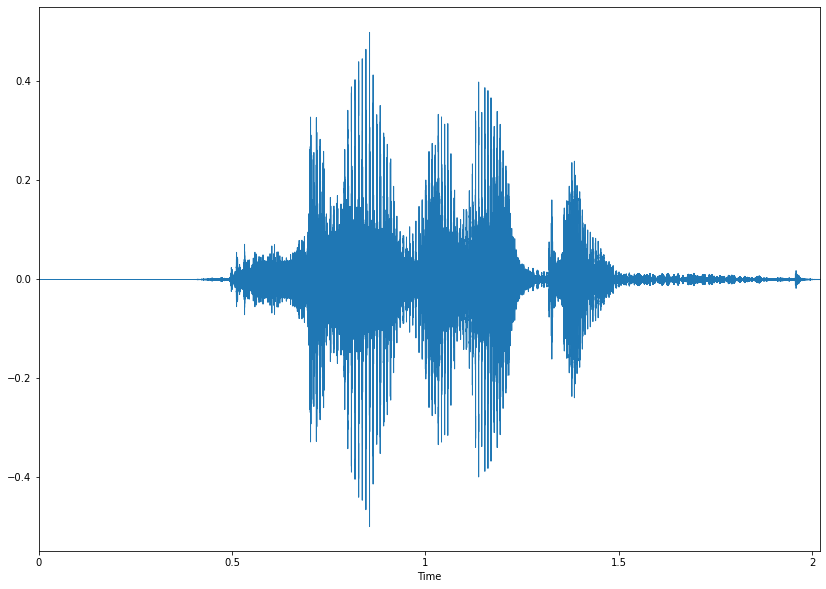

In [188]:
import librosa
import librosa.display

SAMPLING_RATE=16000

path_to_file = "./AwACAgIAAxkBAAJ272AztUC0laD_fpsVJK0Dd9DTgMUVAAJADwACe9qgSY0XqXLg8fwRHgQ.wav"

wave, _ = librosa.load(path_to_file, sr=SAMPLING_RATE)

librosa.display.waveplot(wave, sr=SAMPLING_RATE)

In [189]:
def gen_sin(freq, amplitude, sr=1000):
    return np.sin(
        (freq * 2 * np.pi * np.linspace(0, sr, sr)) / sr
    ) * amplitude

<AxesSubplot:>

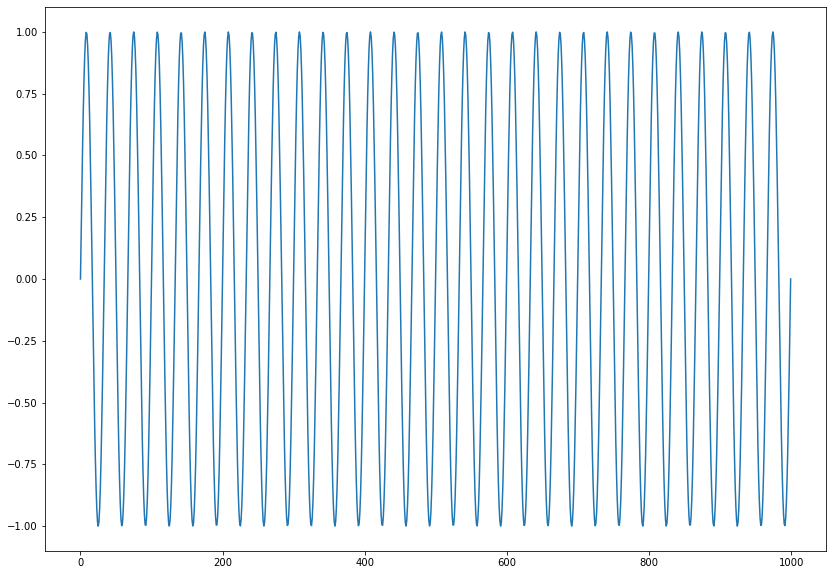

In [190]:
import seaborn as sns

sns.lineplot(data=gen_sin(30, 1))

In [191]:
def plot_wave_composition(defs, hspace=1.0):
    fig_size = plt.rcParams["figure.figsize"]

    plt.rcParams["figure.figsize"] = [14.0, 10.0]

    waves = [
        gen_sin(freq, amp)
        for freq, amp in defs
    ]

    fig, axs = plt.subplots(nrows=len(defs) + 1)

    for ix, wave in enumerate(waves):
        sns.lineplot(data=wave, ax=axs[ix])
        axs[ix].set_ylabel('{}'.format(defs[ix]))

        if ix != 0:
            axs[ix].set_title('+')

    plt.subplots_adjust(hspace = hspace)

    sns.lineplot(data=sum(waves), ax=axs[len(defs)])
    axs[len(defs)].set_ylabel('sum')
    axs[len(defs)].set_xlabel('time')
    axs[len(defs)].set_title('=')

    plt.rcParams["figure.figsize"] = fig_size

    return waves, sum(waves)

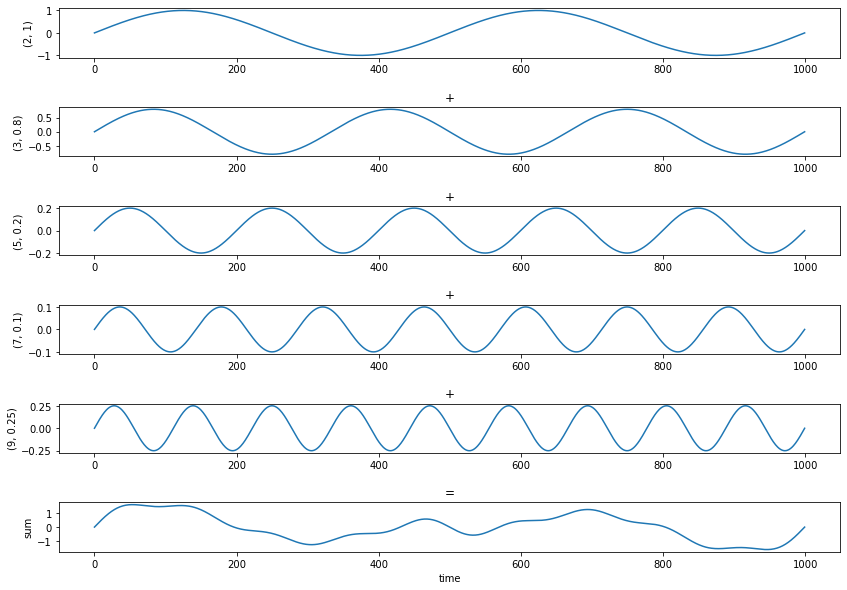

In [192]:
wave_defs = [
        (2, 1),
        (3, 0.8),
        (5, 0.2),
        (7, 0.1),
        (9, 0.25)
    ]

waves, the_sum = plot_wave_composition(wave_defs)

In [203]:
ffts = np.fft.fft(the_sum)
freqs = np.fft.fftfreq(len(the_sum))

frequencies, coeffs = zip(
    *list(
        filter(
            lambda row: row[1] > 10, # arbitrary threshold but let’s not make it too complex for now
            [ (int(abs(freq * 1000)), coef) for freq, coef in zip(freqs[0:(len(ffts) // 2)], np.abs(ffts)[0:(len(ffts) // 2)]) ]
        )
    )
)

In [204]:
from IPython.display import Audio

Audio(data=gen_sin(800, 1, 16000), rate=16000)

In [207]:
# Теперь мы просто тестируем

In [218]:
import unittest

RUN_TESTS = TRUE

class TestNotebook(unittest.TestCase):
    def test_it_works(self):
        self.assertEqual(2 + 2, 4)

if __name__ == '__main__' and RUN_TESTS:
    import doctest

    doctest.testmod()
    unittest.main(
        argv=['first-arg-is-ignored'],
        failfast=True,
        exit=False
    )

NameError: name 'TRUE' is not defined

In [219]:
# assuming test path will look like: 1/file.wav
# the input and output types are driven by the input_fn shown later
# here, we’re just generating values based on the “path”
def dummy_load_wave(example):
    row, params = example
    path = row.filename

    return np.ones((SAMPLING_RATE)) * float(path.split('/')[0]), row

class TestNotebook(unittest.TestCase):

    def test_dataset_returns_data_in_order(self):

        params = experiment_params(
            dataset_params(
                batch_size=2,
                epochs=1,
                augment=False
            )
        )

        data = pd.DataFrame(
            data={
                'text': [ str(i) for i in range(10) ],
                'filename':  [ '{}/wav'.format(i) for i in range(10) ]
            }
        )

        dataset = input_fn(data, params['data'], dummy_load_wave)()
        iterator = dataset.make_one_shot_iterator()
        next_element = iterator.get_next()

        with tf.Session() as session:
            try:
                while True:
                    audio, label = session.run(next_element)
                    audio, length = audio

                    for _audio, _label in zip(list(audio), list(label)):
                        self.assertEqual(_audio[0], float(_label))

                    for _length in length:
                        self.assertEqual(_length, SAMPLING_RATE)
            except tf.errors.OutOfRangeError:
                pass

In [220]:
import librosa
import hickle as hkl
import os.path

def to_path(filename):
    return './data/cv_corpus_v1/' + filename

def load_wave(example, absolute=False):
    row, params = example

    _path = row.filename if absolute else to_path(row.filename)

    if os.path.isfile(_path + '.wave.hkl'):
        wave = hkl.load(_path + '.wave.hkl').astype(np.float32)
    else:
        wave, _ = librosa.load(_path, sr=SAMPLING_RATE)
        hkl.dump(wave, _path + '.wave.hkl')

    if len(wave) <= params['max_wave_length']:
        if params['augment']:
            wave = random_noise(
                random_stretch(
                    random_shift(
                        wave,
                        params
                    ),
                    params
                ),
                params
            )
    else:
        wave = None

    return wave, row

In [221]:
from multiprocessing import Pool

def input_fn(input_dataset, params, load_wave_fn=load_wave):
    def _input_fn():
        """
        Returns raw audio wave along with the label
        """

        dataset = input_dataset

        print(params)

        if 'max_text_length' in params and params['max_text_length'] is not None:
            print('Constraining dataset to the max_text_length')
            dataset = input_dataset[input_dataset.text.str.len() < params['max_text_length']]

        if 'min_text_length' in params and params['min_text_length'] is not None:
            print('Constraining dataset to the min_text_length')
            dataset = input_dataset[input_dataset.text.str.len() >= params['min_text_length']]

        if 'max_wave_length' in params and params['max_wave_length'] is not None:
            print('Constraining dataset to the max_wave_length')

        print('Resulting dataset length: {}'.format(len(dataset)))

        def generator_fn():
            pool = Pool()
            buffer = []

            for epoch in range(params['epochs']):
                for _, row in dataset.sample(frac=1).iterrows():
                    buffer.append((row, params))

                    if len(buffer) >= params['batch_size']:

                        if params['parallelize']:
                            audios = pool.map(
                                load_wave_fn,
                                buffer
                            )
                        else:
                            audios = map(
                                load_wave_fn,
                                buffer
                            )

                        for audio, row in audios:
                            if audio is not None:
                                if np.isnan(audio).any():
                                    print('SKIPPING! NaN coming from the pipeline!')
                                else:
                                    yield (audio, len(audio)), row.text.encode()

                        buffer = []

        return tf.data.Dataset.from_generator(
                generator_fn,
                output_types=((tf.float32, tf.int32), (tf.string)),
                output_shapes=((None,()), (()))
            ) \
            .padded_batch(
                batch_size=params['batch_size'],
                padded_shapes=(
                    (tf.TensorShape([None]), tf.TensorShape(())),
                    tf.TensorShape(())
                )
            )

    return _input_fn

In [222]:
import random
import glob

noise_files = glob.glob('./data/*.wav')
noises = {}

def random_stretch(audio, params):
    rate = random.uniform(params['random_stretch_min'], params['random_stretch_max'])

    return librosa.effects.time_stretch(audio, rate)

def random_shift(audio, params):
    _shift = random.randrange(params['random_shift_min'], params['random_shift_max'])

    if _shift < 0:
        pad = (_shift * -1, 0)
    else:
        pad = (0, _shift)

    return np.pad(audio, pad, mode='constant')

def random_noise(audio, params):
    _factor = random.uniform(
        params['random_noise_factor_min'],
        params['random_noise_factor_max']
    )

    if params['random_noise'] > random.uniform(0, 1):
        _path = random.choice(noise_files)

        if _path in noises:
            wave = noises[_path]
        else:
            if os.path.isfile(_path + '.wave.hkl'):
                wave = hkl.load(_path + '.wave.hkl').astype(np.float32)
                noises[_path] = wave
            else:
                wave, _ = librosa.load(_path, sr=SAMPLING_RATE)
                hkl.dump(wave, _path + '.wave.hkl')
                noises[_path] = wave

        noise = random_shift(
            wave,
            {
                'random_shift_min': -16000,
                'random_shift_max': 16000
            }
        )

        max_noise = np.max(noise[0:len(audio)])
        max_wave = np.max(audio)

        noise = noise * (max_wave / max_noise)

        return _factor * noise[0:len(audio)] + (1.0 - _factor) * audio
    else:
        return audio

In [223]:
def dataset_params(batch_size=32,
                   epochs=50000,
                   parallelize=True,
                   max_text_length=None,
                   min_text_length=None,
                   max_wave_length=80000,
                   shuffle=True,
                   random_shift_min=-4000,
                   random_shift_max= 4000,
                   random_stretch_min=0.7,
                   random_stretch_max= 1.3,
                   random_noise=0.75,
                   random_noise_factor_min=0.2,
                   random_noise_factor_max=0.5,
                   augment=False):
    return {
        'parallelize': parallelize,
        'shuffle': shuffle,
        'max_text_length': max_text_length,
        'min_text_length': min_text_length,
        'max_wave_length': max_wave_length,
        'random_shift_min': random_shift_min,
        'random_shift_max': random_shift_max,
        'random_stretch_min': random_stretch_min,
        'random_stretch_max': random_stretch_max,
        'random_noise': random_noise,
        'random_noise_factor_min': random_noise_factor_min,
        'random_noise_factor_max': random_noise_factor_max,
        'epochs': epochs,
        'batch_size': batch_size,
        'augment': augment
    }

In [ ]:
@given(st.text(alphabet="abcdefghijk1234!@#$%^&*", max_size=10))
def test_encode_and_decode_work(self, text):
    assume(text != '')

    params = { 'alphabet': 'abcdefghijk1234!@#$%^&*' }

    label_ph = tf.placeholder(tf.string, shape=(1), name='text')
    codes_op = encode_labels(label_ph, params)
    decode_op = decode_codes(codes_op, params)

    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        session.run(tf.tables_initializer(name='init_all_tables'))

        codes, decoded = session.run(
            [codes_op, decode_op],
            {
                label_ph: np.array([text])
            }
        )

        note(codes)
        note(decoded)

        self.assertEqual(text, ''.join(map(lambda s: s.decode('UTF-8'), decoded.values)))
        self.assertEqual(codes.values.dtype, np.int32)
        self.assertEqual(len(codes.values), len(text))

In [35]:
# Всё работает отлично. Мы потом сделаем отдельный скрипт где мы будем брать готовые голоса от TTS.UZ для движка Speech To Text.